<a href="https://colab.research.google.com/github/woodwyyn/data-analytics-final/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Этап 1. Импорт библиотек и загрузка данных***

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default')


# Настройка для красивых графиков
%matplotlib inline
plt.style.use('default')
sns.set_palette("husl")
# Настройка pandas для отображения чисел
pd.options.display.float_format = '{:,.0f}'.format



print("Библиотеки загружены!")


Библиотеки загружены!


In [3]:
# Загрузка данных из CSV файлов
commodities_df = pd.read_csv('commodities.csv')
countries_df = pd.read_csv('countries.csv')
trade_df = pd.read_csv('trade.csv')

print("Данные загружены!")


Данные загружены!


***Этап 2. Первчиный анализ таблиц***

In [4]:
# Обзор
print("=== ТАБЛИЦА COMMODITIES (ТОВАРЫ) ===")
print(commodities_df.info())

display(commodities_df.head())
print("\nПропущенные значения:")
print(commodities_df.isnull().sum())
# Анализ столбца Sector (сектора экономики)
print("\nРаспределение по секторам:")
display(commodities_df['sector'].value_counts())

=== ТАБЛИЦА COMMODITIES (ТОВАРЫ) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      99 non-null     int64 
 1   text    99 non-null     object
 2   sector  99 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB
None


,id,text,sector
0,1,Живые животные,Сельское хозяйство и пищевая промышленность
1,2,Мясо и пищевые мясные субпродукты,Сельское хозяйство и пищевая промышленность
2,3,"Рыба и ракообразные, моллюски и прочие водные ...",Сельское хозяйство и пищевая промышленность
3,4,Молочные продукты; яйца птиц; натуральный мёд;...,Сельское хозяйство и пищевая промышленность
4,5,"Продукты животного происхождения, не поименова...",Сельское хозяйство и пищевая промышленность



Пропущенные значения:
id        0
text      0
sector    0
dtype: int64

Распределение по секторам:


,count
sector,
Сельское хозяйство и пищевая промышленность,24
Текстильная и швейная промышленность,17
Металлургия и металлообработка,12
Химическая промышленность,11
Кожевенная и деревообрабатывающая промышленность,6
Машиностроение и электроника,6
Минеральные материалы и изделия из них,4
Приборостроение и высокие технологии,3
Целлюлозно-бумажная промышленность,3


In [5]:
# Обзор
print("=== ТАБЛИЦА COUNTRIES (СТРАНЫ) ===")
display(countries_df.info())
print("\nПервые 5 строк:")
display(countries_df.head())
print("\nПропущенные значения:")
print(countries_df.isnull().sum())
# Распределение стран по частям света
print("Распределение стран по регионам:")
display(countries_df['world_part'].value_counts())

=== ТАБЛИЦА COUNTRIES (СТРАНЫ) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     256 non-null    object
 1   text                   256 non-null    object
 2   reporterCodeIsoAlpha3  256 non-null    object
 3   world_part             256 non-null    object
dtypes: object(4)
memory usage: 8.1+ KB


None


Первые 5 строк:


,id,text,reporterCodeIsoAlpha3,world_part
0,4,Афганистан,AFG,Азия
1,8,Албания,ALB,Европа
2,12,Алжир,DZA,Африка
3,20,Андорра,AND,Европа
4,24,Ангола,AGO,Африка



Пропущенные значения:
id                       0
text                     0
reporterCodeIsoAlpha3    0
world_part               0
dtype: int64
Распределение стран по регионам:


,count
world_part,
Африка,63
Азия,60
Америка,58
Европа,51
Австралия и Океания,22
Неизвестно,1
world_part,1


In [6]:
print("=== ТАБЛИЦА TRADE (ТОРГОВЛЯ) ===")
print(trade_df.info())
print("\nПервые 5 строк:")
display(trade_df.head())
print("\nПропущенные значения:")
print(trade_df.isnull().sum())

# Статистика по стоимости операций
print("Статистика по стоимости операций:")
print(f"Минимальная стоимость: {trade_df['primaryValue'].min()}")
print(f"Максимальная стоимость: {trade_df['primaryValue'].max()}")
print(f"Средняя стоимость: {trade_df['primaryValue'].mean():.2f}")
print(f"Медианная стоимость: {trade_df['primaryValue'].median()}")

=== ТАБЛИЦА TRADE (ТОРГОВЛЯ) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521512 entries, 0 to 521511
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   period        521512 non-null  int64  
 1   reporterCode  521512 non-null  int64  
 2   flowCode      521512 non-null  object 
 3   partnerCode   521512 non-null  int64  
 4   cmdCode       521512 non-null  int64  
 5   primaryValue  521512 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 23.9+ MB
None

Первые 5 строк:


,period,reporterCode,flowCode,partnerCode,cmdCode,primaryValue
0,2000,124,M,4,3,"16,361"
1,2000,124,M,4,5,28
2,2000,124,M,4,6,62
3,2000,124,M,4,8,"63,620"
4,2000,124,M,4,12,"2,791"



Пропущенные значения:
period          0
reporterCode    0
flowCode        0
partnerCode     0
cmdCode         0
primaryValue    0
dtype: int64
Статистика по стоимости операций:
Минимальная стоимость: 0.73
Максимальная стоимость: 163564950572.611
Средняя стоимость: 38791701.95
Медианная стоимость: 68063.53450000001


***Этап 3. Объединение таблиц (Join)***

In [7]:
# Сначала объединяем trade с commodities по коду товара
print("Шаг 1: Объединяем trade с commodities")
trade_with_commodities = trade_df.merge(
    commodities_df,
    left_on='cmdCode',     # столбец в trade_df
    right_on='id',         # столбец в commodities_df
    how='left'             # оставляем все записи из trade_df
)

print(f"Размер после объединения с commodities: {trade_with_commodities.shape}")
trade_with_commodities.head()


Шаг 1: Объединяем trade с commodities
Размер после объединения с commodities: (521512, 9)


,period,reporterCode,flowCode,partnerCode,cmdCode,primaryValue,id,text,sector
0,2000,124,M,4,3,"16,361",3,"Рыба и ракообразные, моллюски и прочие водные ...",Сельское хозяйство и пищевая промышленность
1,2000,124,M,4,5,28,5,"Продукты животного происхождения, не поименова...",Сельское хозяйство и пищевая промышленность
2,2000,124,M,4,6,62,6,"Живые деревья и прочие растения; луковицы, кор...",Сельское хозяйство и пищевая промышленность
3,2000,124,M,4,8,"63,620",8,Съедобные фрукты и орехи; кожура цитрусовых ил...,Сельское хозяйство и пищевая промышленность
4,2000,124,M,4,12,"2,791",12,"Масличные семена и плоды; прочие семена, плоды...",Сельское хозяйство и пищевая промышленность


In [8]:
# Шаг 2: Объединяем результат с countries по коду страны-партнера
print("Шаг 2: Объединяем с countries")

# Сначала преобразуем id стран в числовой формат для корректного объединения
countries_df['id_numeric'] = pd.to_numeric(countries_df['id'], errors='coerce')

full_trade_data = trade_with_commodities.merge(
    countries_df,
    left_on='partnerCode',    # код страны-партнера в trade
    right_on='id_numeric',    # числовой id в countries
    how='left'                # оставляем все записи из trade
)

print(f"Размер итогового датафрейма: {full_trade_data.shape}")
full_trade_data.head()


Шаг 2: Объединяем с countries
Размер итогового датафрейма: (521512, 14)


,period,reporterCode,flowCode,partnerCode,cmdCode,primaryValue,id_x,text_x,sector,id_y,text_y,reporterCodeIsoAlpha3,world_part,id_numeric
0,2000,124,M,4,3,"16,361",3,"Рыба и ракообразные, моллюски и прочие водные ...",Сельское хозяйство и пищевая промышленность,4,Афганистан,AFG,Азия,4
1,2000,124,M,4,5,28,5,"Продукты животного происхождения, не поименова...",Сельское хозяйство и пищевая промышленность,4,Афганистан,AFG,Азия,4
2,2000,124,M,4,6,62,6,"Живые деревья и прочие растения; луковицы, кор...",Сельское хозяйство и пищевая промышленность,4,Афганистан,AFG,Азия,4
3,2000,124,M,4,8,"63,620",8,Съедобные фрукты и орехи; кожура цитрусовых ил...,Сельское хозяйство и пищевая промышленность,4,Афганистан,AFG,Азия,4
4,2000,124,M,4,12,"2,791",12,"Масличные семена и плоды; прочие семена, плоды...",Сельское хозяйство и пищевая промышленность,4,Афганистан,AFG,Азия,4


In [9]:
# Переименование столбцов после merge
# Переименовываем столбцы для ясности
full_trade_data = full_trade_data.rename(columns={
    'id_x': 'commodity_id',           # id товара из commodities
    'text_x': 'commodity_name',       # название товара из commodities
    'sector': 'economic_sector',      # сектор экономики из commodities
    'id_y': 'country_id',            # id страны из countries
    'text_y': 'partner_name'         # название страны из countries
})

print("Столбцы переименованы!")
print("Новые названия столбцов:")
display(full_trade_data.columns.tolist())
display(full_trade_data.info())


Столбцы переименованы!
Новые названия столбцов:


['period',
 'reporterCode',
 'flowCode',
 'partnerCode',
 'cmdCode',
 'primaryValue',
 'commodity_id',
 'commodity_name',
 'economic_sector',
 'country_id',
 'partner_name',
 'reporterCodeIsoAlpha3',
 'world_part',
 'id_numeric']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521512 entries, 0 to 521511
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   period                 521512 non-null  int64  
 1   reporterCode           521512 non-null  int64  
 2   flowCode               521512 non-null  object 
 3   partnerCode            521512 non-null  int64  
 4   cmdCode                521512 non-null  int64  
 5   primaryValue           521512 non-null  float64
 6   commodity_id           521512 non-null  int64  
 7   commodity_name         521512 non-null  object 
 8   economic_sector        521512 non-null  object 
 9   country_id             513231 non-null  object 
 10  partner_name           513231 non-null  object 
 11  reporterCodeIsoAlpha3  513231 non-null  object 
 12  world_part             513231 non-null  object 
 13  id_numeric             513231 non-null  float64
dtypes: float64(2), int64(5), object(7)
m

None

In [10]:
# убираем ошибки
print(len(full_trade_data))
full_trade_data = full_trade_data[full_trade_data['commodity_id'] != 99]
print(len(full_trade_data))

521512
513291


***Анализ внешней торговли Канады***

***1. Как изменялись объёмы торговли по годам?***

*   a) Какие года представлены в базе данных?



In [11]:
from pprint import pprint
unique_years = sorted(full_trade_data['period'].dropna().unique())

print("Годы, представляенные в базе данных")
pprint(", ".join(map(str, [int(year) for year in unique_years])))

print(f"\nВременной диапазон: {unique_years[0]} - {unique_years[-1]}")
print(f"Общее количество лет: {len(unique_years)}")

Годы, представляенные в базе данных
('2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, '
 '2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024')

Временной диапазон: 2000 - 2024
Общее количество лет: 25


*   b) Какова динамика экспорта и импорта по годам?
*   c) Каково годовое торговое сальдо (экспорт минус импорт)?


In [12]:
# Группировка по году и направлению потока: импорт (M) и экспорт (X)
annual_trade = (
    full_trade_data
    .groupby(['period', 'flowCode'])['primaryValue']
    .sum()
    .unstack(fill_value=0)
)

# Переименование колонок с сохранением результата
annual_trade = annual_trade.rename(columns={'X': 'Экспорт', 'M': 'Импорт'})

# Округление значений
annual_trade = annual_trade.round(2)

# Добавляем расчетные показатели: торговое сальдо и товарооборот
annual_trade['Сальдо'] = annual_trade['Экспорт'] - annual_trade['Импорт']
annual_trade['Оборот'] = annual_trade['Экспорт'] + annual_trade['Импорт']

print("Годовая динамика внешней торговли (в долларах США):")
display(annual_trade)

Годовая динамика внешней торговли (в долларах США):


flowCode,Импорт,Экспорт,Сальдо,Оборот
period,,,,
2000,"235,411,244,737","261,607,675,172","26,196,430,435","497,018,919,909"
2001,"216,832,017,788","245,217,574,539","28,385,556,751","462,049,592,327"
2002,"218,371,968,028","236,489,045,637","18,117,077,609","454,861,013,665"
2003,"236,264,489,605","257,370,724,764","21,106,235,159","493,635,214,369"
2004,"269,415,710,265","301,760,659,327","32,344,949,062","571,176,369,592"
2005,"309,751,695,955","344,329,136,154","34,577,440,199","654,080,832,109"
2006,"344,867,455,545","371,886,140,258","27,018,684,713","716,753,595,803"
2007,"374,040,823,846","403,530,317,204","29,489,493,358","777,571,141,050"
2008,"401,334,086,650","438,909,830,523","37,575,743,873","840,243,917,173"


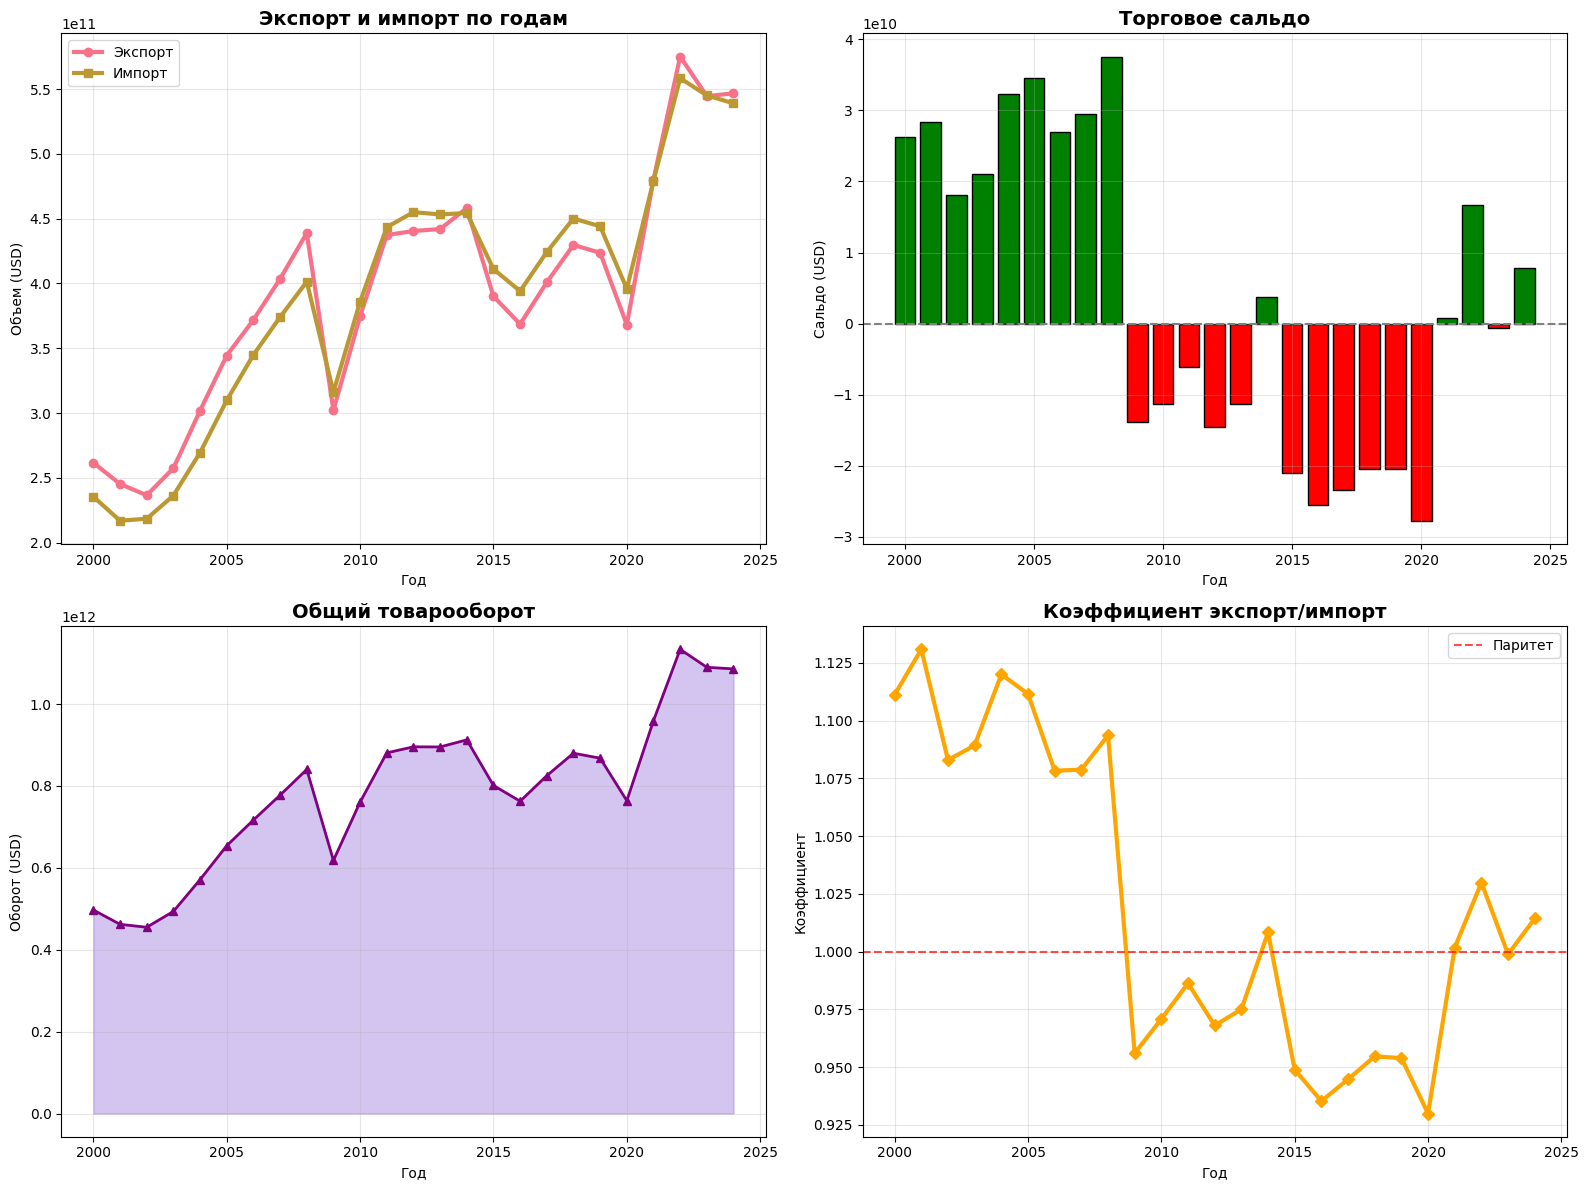

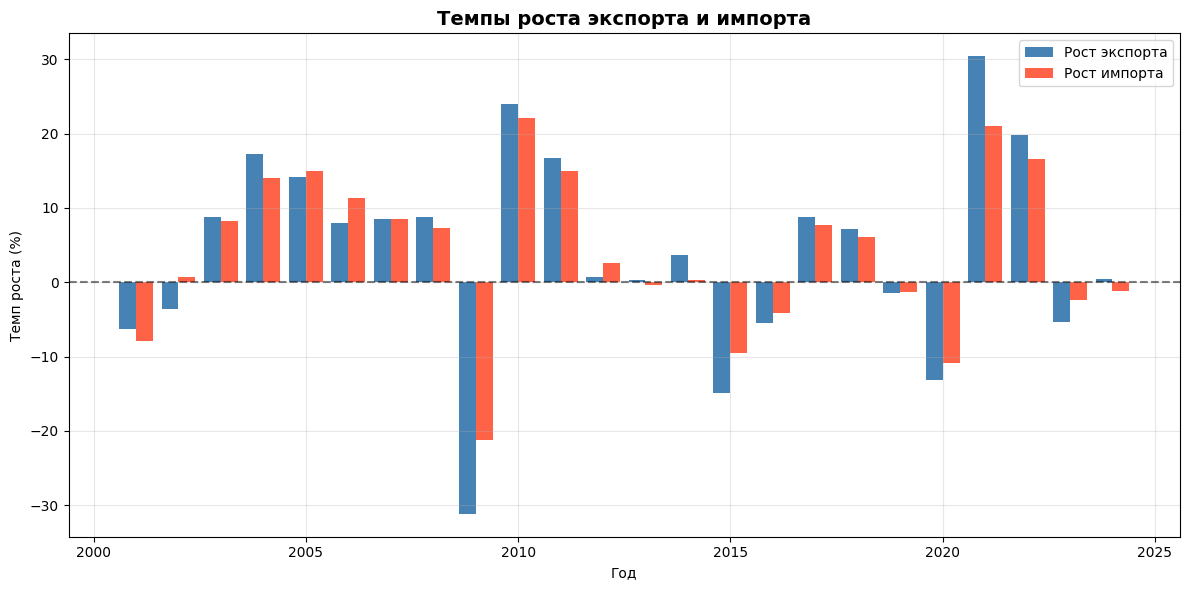


=== КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ ===
Средний экспорт: 393,749,107,102 USD
Средний импорт: 390,238,818,006 USD
Среднее сальдо: 3,510,289,096 USD
Максимальный товарооборот: 1,133,657,036,920 USD в 2022 году


In [13]:
# Подготовка: проверим, что используется нужная таблица
trade_df = annual_trade.copy()

# === ВИЗУАЛИЗАЦИЯ: 4 ГРАФИКА ===
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Динамика экспорта и импорта
axes[0, 0].plot(trade_df.index, trade_df['Экспорт'], marker='o', linewidth=3, label='Экспорт')
axes[0, 0].plot(trade_df.index, trade_df['Импорт'], marker='s', linewidth=3, label='Импорт')
axes[0, 0].set_title('Экспорт и импорт по годам', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Объем (USD)')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# График 2: Торговое сальдо
colors = ['green' if v > 0 else 'red' for v in trade_df['Сальдо']]
axes[0, 1].bar(trade_df.index, trade_df['Сальдо'], color=colors, edgecolor='black')
axes[0, 1].axhline(0, color='gray', linestyle='--')
axes[0, 1].set_title('Торговое сальдо', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Год')
axes[0, 1].set_ylabel('Сальдо (USD)')
axes[0, 1].grid(alpha=0.3)

# График 3: Общий товарооборот
axes[1, 0].fill_between(trade_df.index, trade_df['Оборот'], color='mediumpurple', alpha=0.4)
axes[1, 0].plot(trade_df.index, trade_df['Оборот'], color='purple', marker='^', linewidth=2)
axes[1, 0].set_title('Общий товарооборот', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Год')
axes[1, 0].set_ylabel('Оборот (USD)')
axes[1, 0].grid(alpha=0.3)

# График 4: Соотношение экспорта к импорту (с защитой от деления на ноль)
ratio = trade_df['Экспорт'] / trade_df['Импорт'].replace(0, float('nan'))
axes[1, 1].plot(trade_df.index, ratio, marker='D', color='orange', linewidth=3)
axes[1, 1].axhline(1, linestyle='--', color='red', alpha=0.7, label='Паритет')
axes[1, 1].set_title('Коэффициент экспорт/импорт', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Год')
axes[1, 1].set_ylabel('Коэффициент')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# === ДОП. ГРАФИК: Темпы роста экспорта и импорта ===
fig, ax = plt.subplots(figsize=(12, 6))

# Темпы роста в процентах
export_growth = trade_df['Экспорт'].pct_change() * 100
import_growth = trade_df['Импорт'].pct_change() * 100
years = trade_df.index[1:]

ax.bar(years - 0.2, export_growth[1:], width=0.4, label='Рост экспорта', color='steelblue')
ax.bar(years + 0.2, import_growth[1:], width=0.4, label='Рост импорта', color='tomato')
ax.axhline(0, color='black', linestyle='--', alpha=0.5)
ax.set_title('Темпы роста экспорта и импорта', fontsize=14, fontweight='bold')
ax.set_xlabel('Год')
ax.set_ylabel('Темп роста (%)')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# === СТАТИСТИКА ===
print("\n=== КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ ===")
print(f"Средний экспорт: {trade_df['Экспорт'].mean():,.0f} USD")
print(f"Средний импорт: {trade_df['Импорт'].mean():,.0f} USD")
print(f"Среднее сальдо: {trade_df['Сальдо'].mean():,.0f} USD")
print(f"Максимальный товарооборот: {trade_df['Оборот'].max():,.0f} USD в {trade_df['Оборот'].idxmax()} году")


***2. Какие группы товаров экспортируются и импортируются в наибольшем объёме?***


*   a) Сформируйте топ-10 товарных групп по экспорту и импорту
*   b) Отметьте группы с наибольшим приростом за последние 3 года.


In [14]:
# a) Топ-10 товарных групп по экспорту за весь период
# Отбираем экспортные данные
export_data = full_trade_data.query("flowCode == 'X'")
top_export_groups = (export_data
                     .groupby('commodity_name')['primaryValue']
                     .agg('sum')
                     .nlargest(10)
                     .reset_index()
                     .rename(columns={'commodity_name': 'Товар', 'primaryValue': 'Сумма экспорта ($)'}))
# Добавим долю от общего объема экспорта
total_export_value = export_data['primaryValue'].sum()
top_export_groups['Доля экспорта (%)'] = (top_export_groups['Сумма экспорта ($)'] / total_export_value * 100).round(2)

# Отбираем импортные данные
import_data = full_trade_data.query("flowCode == 'M'")
top_import_groups = (import_data
                     .groupby('commodity_name')['primaryValue']
                     .sum()
                     .nlargest(10)
                     .reset_index()
                     .rename(columns={'commodity_name': 'Товар', 'primaryValue': 'Сумма импорта ($)'}))

# Добавим долю от общего объема импорта
total_import_value = import_data['primaryValue'].sum()
top_import_groups['Доля импорта (%)'] = (top_import_groups['Сумма импорта ($)'] / total_import_value * 100).round(2)

print("Наиболее экспортируемые товарные группы:")
display(top_export_groups)
print("\nНаиболее импортируемые товарные группы:")
display(top_import_groups)

Наиболее экспортируемые товарные группы:


,Товар,Сумма экспорта ($),Доля экспорта (%)
0,"Минеральные топлива, масла и продукты их перег...","2,292,943,463,461",23
1,"Наземные транспортные средства, кроме Ж/Д","1,416,001,347,846",14
2,"Ядерные реакторы, котлы, оборудование и механи...","767,758,618,260",8
3,"Драгоценные и полудрагоценные камни, драгоценн...","390,534,230,175",4
4,"Электрические машины и оборудование, аудио- и ...","370,709,585,921",4
5,Древесина и изделия из древесины; древесный уголь,"328,003,086,791",3
6,Пластмассы и изделия из них,"302,543,170,885",3
7,Летательные аппараты и космические устройства,"246,254,447,066",2
8,Бумага и картон; изделия из бумажной массы,"236,828,824,186",2
9,Алюминий и изделия из него,"225,347,516,675",2



Наиболее импортируемые товарные группы:


,Товар,Сумма импорта ($),Доля импорта (%)
0,"Наземные транспортные средства, кроме Ж/Д","1,585,872,367,467",16
1,"Ядерные реакторы, котлы, оборудование и механи...","1,508,237,784,265",15
2,"Электрические машины и оборудование, аудио- и ...","990,346,288,825",10
3,"Минеральные топлива, масла и продукты их перег...","812,900,111,437",8
4,Пластмассы и изделия из них,"352,848,914,406",4
5,Фармацевтическая продукция,"286,059,674,891",3
6,"Оптические, фотографические, измерительные, ме...","285,876,461,391",3
7,"Драгоценные и полудрагоценные камни, драгоценн...","256,598,052,767",3
8,Изделия из чёрных металлов,"229,429,291,124",2
9,Мебель; постельные принадлежности; матрасы и др.,"190,203,475,852",2


In [15]:
# Определяем последние 3 года в данных
years_to_check = sorted([int(y) for y in full_trade_data['period'].unique()])[-3:]
start_year, end_year = years_to_check[0], years_to_check[-1]
print(f"\nАнализ прироста между {start_year} и {end_year}:")

# Функция для анализа роста по направлению торговли
def calculate_growth(df, flow_label):
    # Фильтрация по направлению и годам
    df_filtered = df.query("flowCode == @flow_label and period in @years_to_check")

    if df_filtered.empty:
        print(f"Нет данных для направления {flow_label} за {years_to_check}.")
        return None

    # Сводная таблица: товары по годам
    by_group_year = df_filtered.pivot_table(
        index='commodity_name',
        columns='period',
        values='primaryValue',
        aggfunc='sum',
        fill_value=0
    )
    by_group_year.columns = by_group_year.columns.astype(int)  # Защита от KeyError

    # Проверка наличия годов
    if start_year not in by_group_year.columns or end_year not in by_group_year.columns:
        print(f"Недостаточно данных для анализа роста: отсутствуют значения за {start_year} или {end_year}.")
        return None

    # Создаём таблицу роста
    growth_df = pd.DataFrame({
        f'Объем {start_year}': by_group_year[start_year],
        f'Объем {end_year}': by_group_year[end_year]
    })

    growth_df['Абсолютный прирост ($)'] = growth_df[f'Объем {end_year}'] - growth_df[f'Объем {start_year}']
    growth_df['Рост (%)'] = ((growth_df[f'Объем {end_year}'] - growth_df[f'Объем {start_year}']) /
                             growth_df[f'Объем {start_year}'].replace(0, 1) * 100).round(2)

    # Фильтрация значимых товаров
    growth_df = growth_df[growth_df[f'Объем {end_year}'] > 1_000_000]

    # Сортировка и отбор топа
    return growth_df.sort_values('Абсолютный прирост ($)', ascending=False).head(10)

# Анализ по экспорту и импорту
export_growth = calculate_growth(full_trade_data, 'X')
import_growth = calculate_growth(full_trade_data, 'M')

# Вывод результатов
if export_growth is not None:
    print(f"\nТоп-10 товарных позиций по приросту экспорта ({start_year}–{end_year}):")
    display(export_growth[['Абсолютный прирост ($)', 'Рост (%)']])

if import_growth is not None:
    print(f"\nТоп-10 товарных позиций по приросту импорта ({start_year}–{end_year}):")
    display(import_growth[['Абсолютный прирост ($)', 'Рост (%)']])



Анализ прироста между 2022 и 2024:

Топ-10 товарных позиций по приросту экспорта (2022–2024):


,Абсолютный прирост ($),Рост (%)
commodity_name,,
"Драгоценные и полудрагоценные камни, драгоценные металлы, монеты","10,668,847,775",48
"Наземные транспортные средства, кроме Ж/Д","7,765,475,452",15
"Ядерные реакторы, котлы, оборудование и механические устройства","3,293,579,458",9
Летательные аппараты и космические устройства,"3,062,808,137",30
"Электрические машины и оборудование, аудио- и видеотехника","2,709,461,851",18
Неорганические химические продукты,"1,635,580,709",30
"Готовые продукты из зерна, муки, крахмала или молока; мучные кондитерские изделия","1,041,442,539",17
Какао и продукты из него,"954,211,702",45
Фармацевтическая продукция,"556,733,949",5



Топ-10 товарных позиций по приросту импорта (2022–2024):


,Абсолютный прирост ($),Рост (%)
commodity_name,,
"Наземные транспортные средства, кроме Ж/Д","7,854,689,724",10
"Ядерные реакторы, котлы, оборудование и механические устройства","2,284,445,058",3
"Оптические, фотографические, измерительные, медицинские и др. приборы","1,131,365,820",8
Какао и продукты из него,"1,020,482,822",53
Животные или растительные жиры и масла и их расщеплённые продукты,"824,316,900",48
Летательные аппараты и космические устройства,"799,306,380",10
"Эфирные масла и резиноиды; парфюмерная, косметическая и туалетная продукция","556,796,628",13
Разнообразные пищевые продукты,"465,583,922",13
"Готовые продукты из зерна, муки, крахмала или молока; мучные кондитерские изделия","421,480,934",10


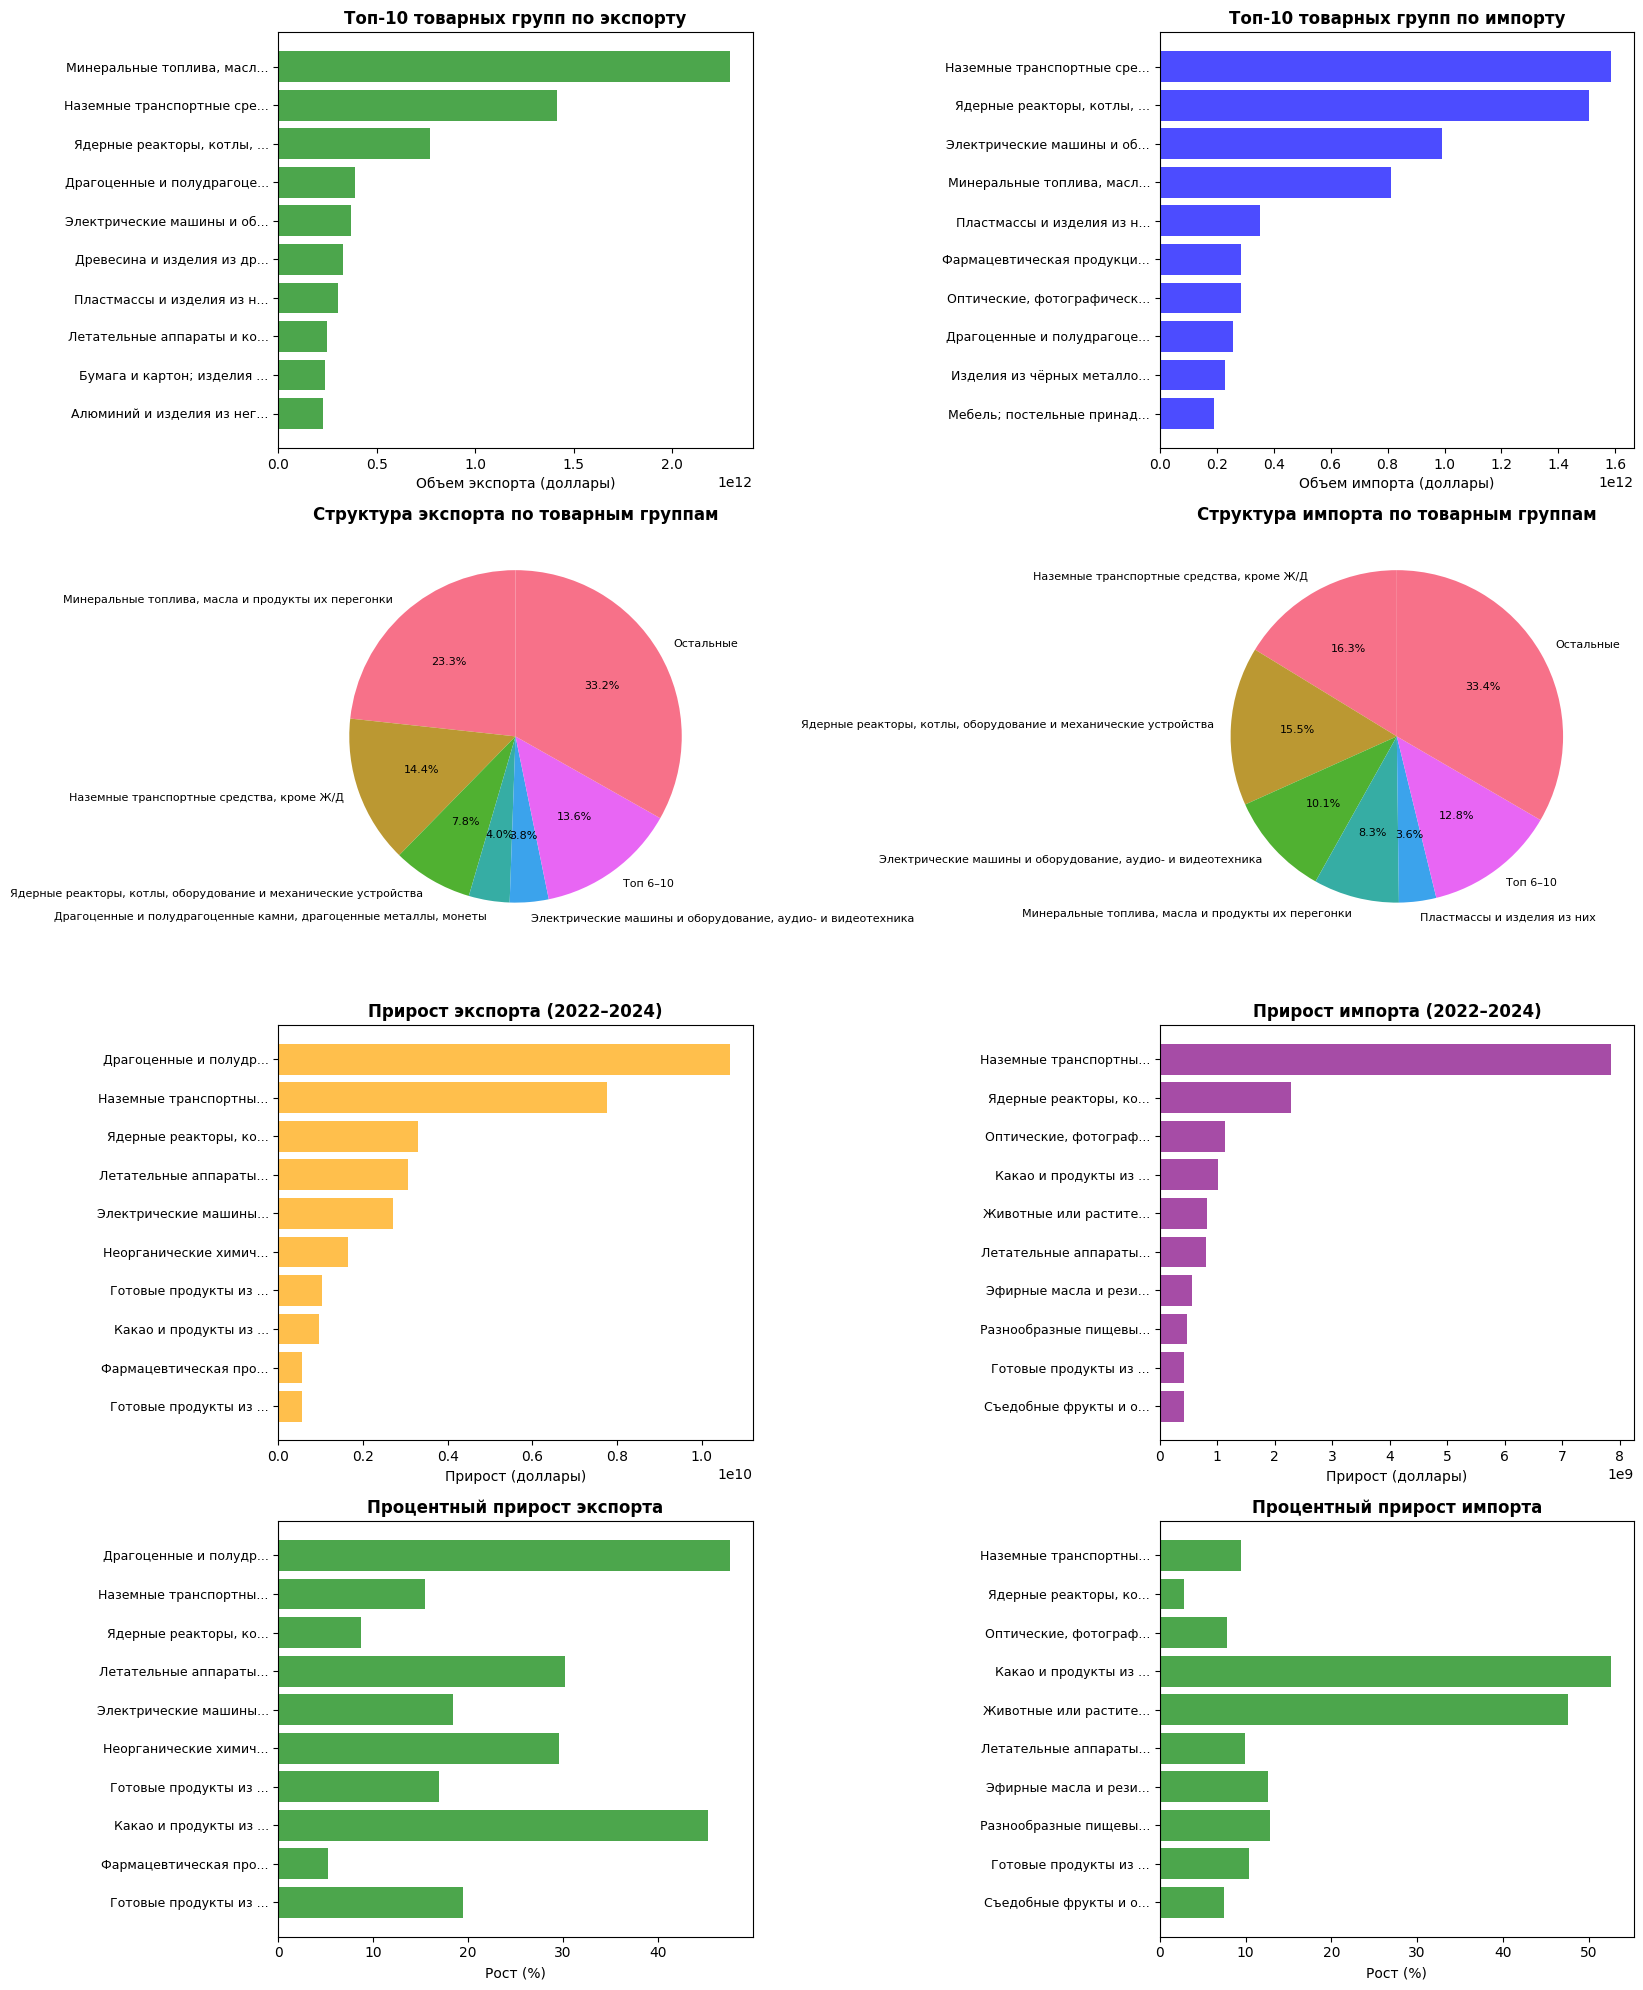

In [16]:
# Создаем фигуру с подграфиками (4 строки, 2 столбца)
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

# --- График 1: Топ-10 экспорт ---
axes[0, 0].barh(range(len(top_export_groups)), top_export_groups['Сумма экспорта ($)'],
                color='green', alpha=0.7)
axes[0, 0].set_yticks(range(len(top_export_groups)))
axes[0, 0].set_yticklabels([name[:25] + '...' if len(name) > 25 else name
                            for name in top_export_groups['Товар']], fontsize=9)
axes[0, 0].set_title('Топ-10 товарных групп по экспорту', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Объем экспорта (доллары)')
axes[0, 0].invert_yaxis()

# --- График 2: Топ-10 импорт ---
axes[0, 1].barh(range(len(top_import_groups)), top_import_groups['Сумма импорта ($)'],
                color='blue', alpha=0.7)
axes[0, 1].set_yticks(range(len(top_import_groups)))
axes[0, 1].set_yticklabels([name[:25] + '...' if len(name) > 25 else name
                            for name in top_import_groups['Товар']], fontsize=9)
axes[0, 1].set_title('Топ-10 товарных групп по импорту', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Объем импорта (доллары)')
axes[0, 1].invert_yaxis()

# --- График 3: Круговая диаграмма экспорта ---
export_shares = top_export_groups['Доля экспорта (%)']
other_export = 100 - export_shares.sum()
top5_export = export_shares[:5]
top6_10_export = export_shares[5:].sum()
export_pie_data = list(top5_export) + [top6_10_export, other_export]
export_pie_labels = list(top_export_groups['Товар'][:5]) + ['Топ 6–10', 'Остальные']

axes[1, 0].pie(export_pie_data, labels=export_pie_labels, autopct='%1.1f%%',
               startangle=90, textprops={'fontsize': 8})
axes[1, 0].set_title('Структура экспорта по товарным группам', fontsize=12, fontweight='bold')

# --- График 4: Круговая диаграмма импорта ---
import_shares = top_import_groups['Доля импорта (%)']
other_import = 100 - import_shares.sum()
top5_import = import_shares[:5]
top6_10_import = import_shares[5:].sum()
import_pie_data = list(top5_import) + [top6_10_import, other_import]
import_pie_labels = list(top_import_groups['Товар'][:5]) + ['Топ 6–10', 'Остальные']

axes[1, 1].pie(import_pie_data, labels=import_pie_labels, autopct='%1.1f%%',
               startangle=90, textprops={'fontsize': 8})
axes[1, 1].set_title('Структура импорта по товарным группам', fontsize=12, fontweight='bold')

# --- График 5: Абсолютный прирост экспорта ---
if export_growth is not None:
    axes[2, 0].barh(range(len(export_growth)), export_growth['Абсолютный прирост ($)'],
                    color='orange', alpha=0.7)
    axes[2, 0].set_yticks(range(len(export_growth)))
    axes[2, 0].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                                for name in export_growth.index], fontsize=9)
    axes[2, 0].set_title(f'Прирост экспорта ({start_year}–{end_year})', fontsize=12, fontweight='bold')
    axes[2, 0].set_xlabel('Прирост (доллары)')
    axes[2, 0].invert_yaxis()

# --- График 6: Абсолютный прирост импорта ---
if import_growth is not None:
    axes[2, 1].barh(range(len(import_growth)), import_growth['Абсолютный прирост ($)'],
                    color='purple', alpha=0.7)
    axes[2, 1].set_yticks(range(len(import_growth)))
    axes[2, 1].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                                for name in import_growth.index], fontsize=9)
    axes[2, 1].set_title(f'Прирост импорта ({start_year}–{end_year})', fontsize=12, fontweight='bold')
    axes[2, 1].set_xlabel('Прирост (доллары)')
    axes[2, 1].invert_yaxis()

# --- График 7: Процентный прирост экспорта ---
if export_growth is not None:
    colors_exp = ['green' if x > 0 else 'red' for x in export_growth['Рост (%)']]
    axes[3, 0].barh(range(len(export_growth)), export_growth['Рост (%)'],
                    color=colors_exp, alpha=0.7)
    axes[3, 0].set_yticks(range(len(export_growth)))
    axes[3, 0].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                                for name in export_growth.index], fontsize=9)
    axes[3, 0].set_title('Процентный прирост экспорта', fontsize=12, fontweight='bold')
    axes[3, 0].set_xlabel('Рост (%)')
    axes[3, 0].invert_yaxis()
    axes[3, 0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# --- График 8: Процентный прирост импорта ---
if import_growth is not None:
    colors_imp = ['green' if x > 0 else 'red' for x in import_growth['Рост (%)']]
    axes[3, 1].barh(range(len(import_growth)), import_growth['Рост (%)'],
                    color=colors_imp, alpha=0.7)
    axes[3, 1].set_yticks(range(len(import_growth)))
    axes[3, 1].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                                for name in import_growth.index], fontsize=9)
    axes[3, 1].set_title('Процентный прирост импорта', fontsize=12, fontweight='bold')
    axes[3, 1].set_xlabel('Рост (%)')
    axes[3, 1].invert_yaxis()
    axes[3, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


In [17]:
print(f"\n=== СТАТИСТИКА ПО ТОВАРНЫМ ГРУППАМ ===")
print(f"Доля топ-10 товаров в экспорте: {top_export_groups['Доля экспорта (%)'].sum():.1f}%")
print(f"Доля топ-10 товаров в импорте: {top_import_groups['Доля импорта (%)'].sum():.1f}%")

if export_growth is not None and len(export_growth) > 0:
    print(f"Наибольший прирост экспорта: {export_growth.index[0]} ({export_growth['Абсолютный прирост ($)'].iloc[0]:,.0f} долларов)")
if import_growth is not None and len(import_growth) > 0:
    print(f"Наибольший прирост импорта: {import_growth.index[0]} ({import_growth['Абсолютный прирост ($)'].iloc[0]:,.0f} долларов)")



=== СТАТИСТИКА ПО ТОВАРНЫМ ГРУППАМ ===
Доля топ-10 товаров в экспорте: 66.8%
Доля топ-10 товаров в импорте: 66.6%
Наибольший прирост экспорта: Драгоценные и полудрагоценные камни, драгоценные металлы, монеты (10,668,847,775 долларов)
Наибольший прирост импорта: Наземные транспортные средства, кроме Ж/Д (7,854,689,724 долларов)


***3. Какие секторы экономики преобладают в торговле?***



*   a) Определите долю каждого сектора в структуре экспорта и импорта.

=== АНАЛИЗ СЕКТОРНОЙ СТРУКТУРЫ ТОРГОВЛИ ЗА ПОСЛЕДНИЙ ГОД ===
Рассматриваем данные за год: 2024
Всего записей за 2024 год: 21645

=== СЕКТОРНАЯ СТРУКТУРА ЭКСПОРТА В 2024 ГОДУ ===


,Сектор,Объем экспорта ($),Доля в экспорте (%)
0,Топливно-энергетический комплекс,"144,995,461,499",27
1,Машиностроение и электроника,"130,347,859,222",24
2,Сельское хозяйство и пищевая промышленность,"74,196,025,465",14
3,Металлургия и металлообработка,"41,139,093,617",8
4,Химическая промышленность,"38,765,579,305",7
5,Минеральные материалы и изделия из них,"35,240,863,442",6
6,"Пластмассы, резина и изделия из них","19,780,385,555",4
7,Целлюлозно-бумажная промышленность,"14,520,424,937",3
8,Кожевенная и деревообрабатывающая промышленность,"13,998,820,557",3
9,Строительные материалы и сырьё,"13,234,770,775",2



=== СЕКТОРНАЯ СТРУКТУРА ИМПОРТА В 2024 ГОДУ ===


,Сектор,Объем импорта ($),Доля в импорте (%)
0,Машиностроение и электроника,"237,072,625,226",44
1,Химическая промышленность,"54,207,907,537",10
2,Сельское хозяйство и пищевая промышленность,"53,710,451,609",10
3,Металлургия и металлообработка,"36,511,169,201",7
4,Топливно-энергетический комплекс,"34,609,252,455",6
5,"Пластмассы, резина и изделия из них","26,521,997,054",5
6,Минеральные материалы и изделия из них,"24,714,225,671",5
7,Текстильная и швейная промышленность,"18,442,517,452",3
8,Приборостроение и высокие технологии,"16,512,689,679",3
9,Промтовары и мебель,"15,947,238,077",3


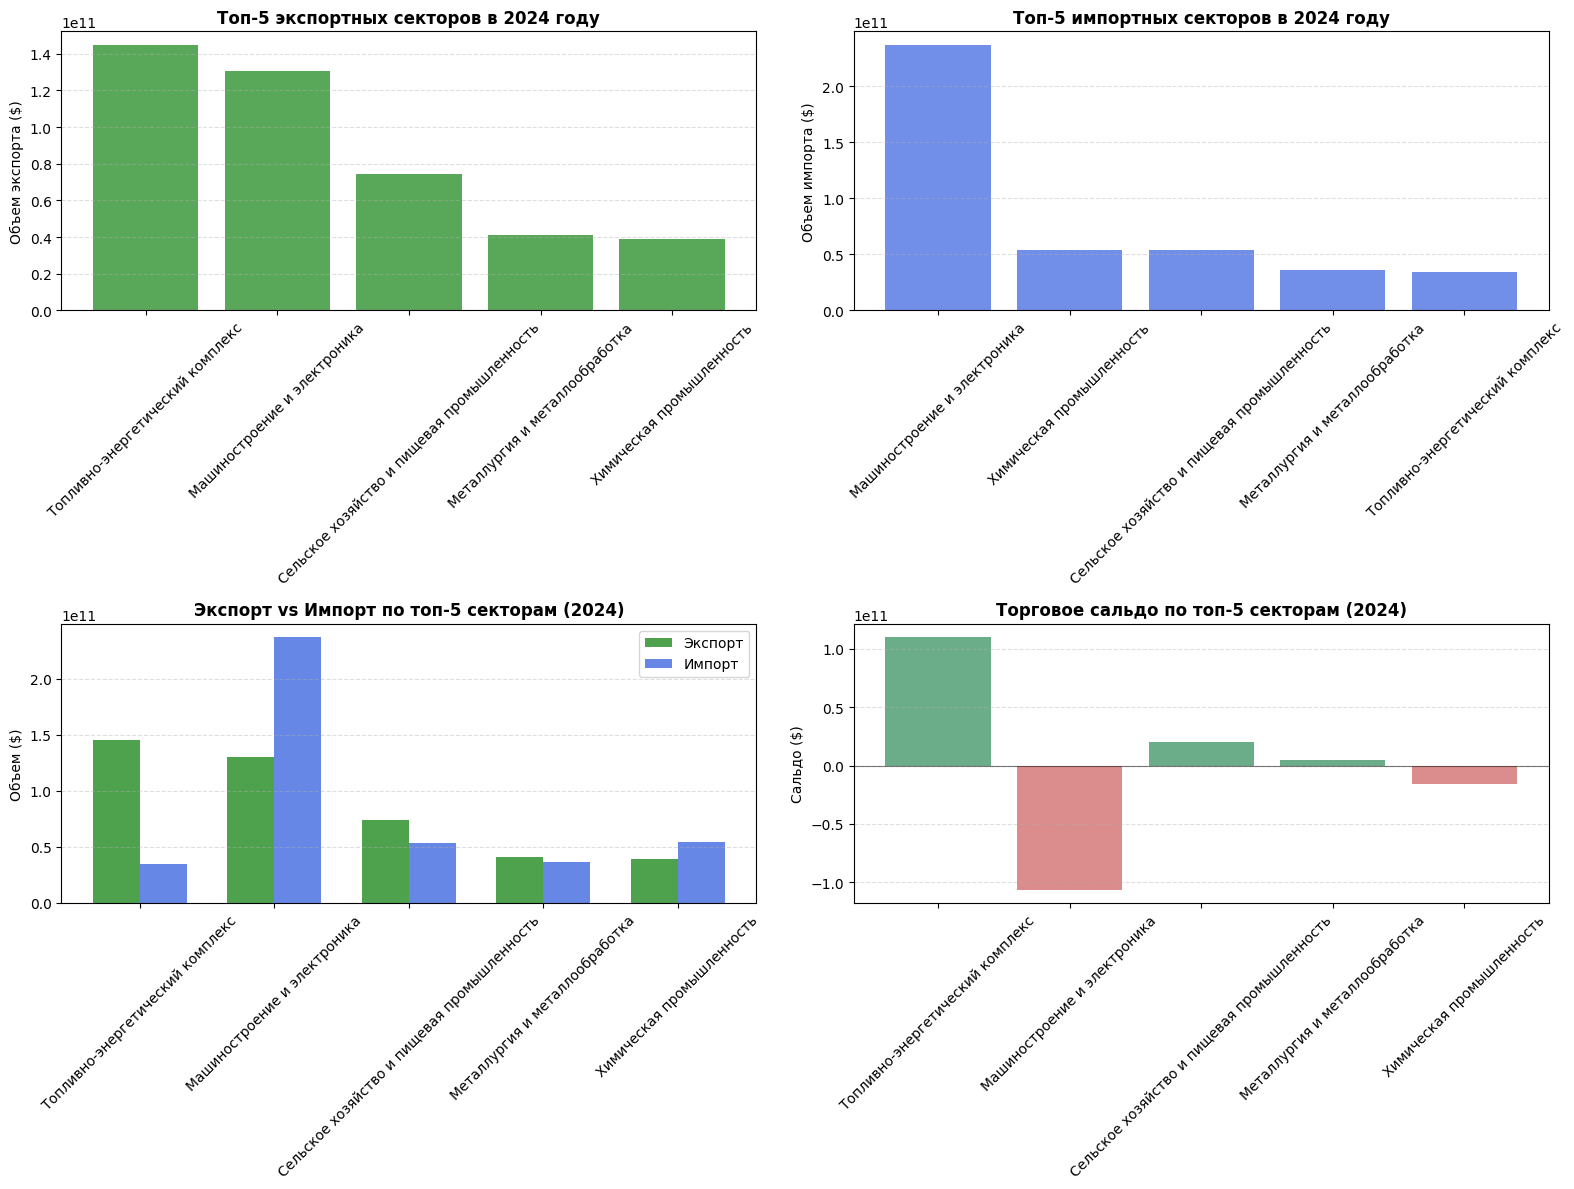


=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ТОП-5 СЕКТОРОВ (2024) ===


,Экспорт ($),Импорт ($),Торговое сальдо ($),Доля в экспорте (%),Доля в импорте (%)
economic_sector,,,,,
Топливно-энергетический комплекс,"144,995,461,499","34,609,252,455","110,386,209,044",27,6
Машиностроение и электроника,"130,347,859,222","237,072,625,226","-106,724,766,005",24,44
Сельское хозяйство и пищевая промышленность,"74,196,025,465","53,710,451,609","20,485,573,856",14,10
Металлургия и металлообработка,"41,139,093,617","36,511,169,201","4,627,924,416",8,7
Химическая промышленность,"38,765,579,305","54,207,907,537","-15,442,328,232",7,10



=== ОСНОВНЫЕ ВЫВОДЫ ПО ТОП-5 СЕКТОРАМ ЗА 2024 ГОД ===
Лидирующий экспортный сектор: Топливно-энергетический комплекс
  Доля в экспорте: 26.52%
  Экспортный объем: 144,995,461,499 $

Лидирующий импортный сектор: Машиностроение и электроника
  Доля в импорте: 43.98%
  Импортный объем: 237,072,625,226 $

Концентрация в топ-5 секторах:
  Доля топ-5 в экспорте: 78.5%
  Доля топ-5 в импорте: 77.2%

Общие показатели за 2024 год:
  Общий экспорт: 546,797,286,380 $
  Общий импорт: 539,031,109,486 $
  Торговое сальдо: 7,766,176,895 $


In [18]:
import matplotlib.pyplot as plt

print("=== АНАЛИЗ СЕКТОРНОЙ СТРУКТУРЫ ТОРГОВЛИ ЗА ПОСЛЕДНИЙ ГОД ===")

# Определяем самый свежий год в данных
most_recent_year = full_trade_data['period'].max()
print(f"Рассматриваем данные за год: {most_recent_year}")

# Фильтруем записи по последнему году
data_last_year = full_trade_data[full_trade_data['period'] == most_recent_year]

print(f"Всего записей за {most_recent_year} год: {len(data_last_year)}")

# --- Анализ экспортных секторов ---
export_last_year = data_last_year[data_last_year['flowCode'] == 'X']
sector_export_sums = export_last_year.groupby('economic_sector')['primaryValue'].sum().sort_values(ascending=False)

total_export_volume = sector_export_sums.sum()
sector_export_percentage = (sector_export_sums / total_export_volume * 100).round(2)

export_sector_df = pd.DataFrame({
    'Сектор': sector_export_sums.index,
    'Объем экспорта ($)': sector_export_sums.values,
    'Доля в экспорте (%)': sector_export_percentage.values
})

print(f"\n=== СЕКТОРНАЯ СТРУКТУРА ЭКСПОРТА В {most_recent_year} ГОДУ ===")
display(export_sector_df)

# --- Анализ импортных секторов ---
import_last_year = data_last_year[data_last_year['flowCode'] == 'M']
sector_import_sums = import_last_year.groupby('economic_sector')['primaryValue'].sum().sort_values(ascending=False)

total_import_volume = sector_import_sums.sum()
sector_import_percentage = (sector_import_sums / total_import_volume * 100).round(2)

import_sector_df = pd.DataFrame({
    'Сектор': sector_import_sums.index,
    'Объем импорта ($)': sector_import_sums.values,
    'Доля в импорте (%)': sector_import_percentage.values
})

print(f"\n=== СЕКТОРНАЯ СТРУКТУРА ИМПОРТА В {most_recent_year} ГОДУ ===")
display(import_sector_df)

# Выделяем топ-5 секторов для наглядности
top5_export_sectors = sector_export_sums.head(5)
top5_import_sectors = sector_import_sums.head(5)

# --- Визуализация ---
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Топ-5 экспортных секторов
axs[0, 0].bar(top5_export_sectors.index, top5_export_sectors.values, color='forestgreen', alpha=0.75)
axs[0, 0].set_title(f'Топ-5 экспортных секторов в {most_recent_year} году', fontsize=12, fontweight='bold')
axs[0, 0].set_ylabel('Объем экспорта ($)')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.4)

# График 2: Топ-5 импортных секторов
axs[0, 1].bar(top5_import_sectors.index, top5_import_sectors.values, color='royalblue', alpha=0.75)
axs[0, 1].set_title(f'Топ-5 импортных секторов в {most_recent_year} году', fontsize=12, fontweight='bold')
axs[0, 1].set_ylabel('Объем импорта ($)')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.4)

# График 3: Сравнение топ-5 экспортных и импортных секторов
bar_width = 0.35
indices = range(len(top5_export_sectors))

axs[1, 0].bar([i - bar_width/2 for i in indices], top5_export_sectors.values, bar_width, label='Экспорт', color='forestgreen', alpha=0.8)
axs[1, 0].bar([i + bar_width/2 for i in indices], top5_import_sectors.reindex(top5_export_sectors.index, fill_value=0).values, bar_width, label='Импорт', color='royalblue', alpha=0.8)
axs[1, 0].set_title(f'Экспорт vs Импорт по топ-5 секторам ({most_recent_year})', fontsize=12, fontweight='bold')
axs[1, 0].set_xticks(indices)
axs[1, 0].set_xticklabels(top5_export_sectors.index, rotation=45)
axs[1, 0].set_ylabel('Объем ($)')
axs[1, 0].legend()
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.4)

# График 4: Торговое сальдо по топ-5 секторам
trade_balance = top5_export_sectors - top5_import_sectors.reindex(top5_export_sectors.index, fill_value=0)
bar_colors = ['seagreen' if x >= 0 else 'indianred' for x in trade_balance]

axs[1, 1].bar(top5_export_sectors.index, trade_balance.values, color=bar_colors, alpha=0.7)
axs[1, 1].axhline(0, color='black', linewidth=0.8, alpha=0.5)
axs[1, 1].set_title(f'Торговое сальдо по топ-5 секторам ({most_recent_year})', fontsize=12, fontweight='bold')
axs[1, 1].set_ylabel('Сальдо ($)')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# --- Таблица сравнения ---
comparison_df = pd.DataFrame({
    'Экспорт ($)': top5_export_sectors,
    'Импорт ($)': top5_import_sectors.reindex(top5_export_sectors.index, fill_value=0),
    'Торговое сальдо ($)': trade_balance,
    'Доля в экспорте (%)': sector_export_percentage[top5_export_sectors.index],
    'Доля в импорте (%)': sector_import_percentage.reindex(top5_export_sectors.index, fill_value=0)
})

print(f"\n=== СРАВНИТЕЛЬНЫЙ АНАЛИЗ ТОП-5 СЕКТОРОВ ({most_recent_year}) ===")
display(comparison_df.round(2))

# --- Ключевые выводы ---
print(f"\n=== ОСНОВНЫЕ ВЫВОДЫ ПО ТОП-5 СЕКТОРАМ ЗА {most_recent_year} ГОД ===")

dominant_export_sector = export_sector_df.iloc[0]
print(f"Лидирующий экспортный сектор: {dominant_export_sector['Сектор']}")
print(f"  Доля в экспорте: {dominant_export_sector['Доля в экспорте (%)']}%")
print(f"  Экспортный объем: {dominant_export_sector['Объем экспорта ($)']:,.0f} $")

dominant_import_sector = import_sector_df.iloc[0]
print(f"\nЛидирующий импортный сектор: {dominant_import_sector['Сектор']}")
print(f"  Доля в импорте: {dominant_import_sector['Доля в импорте (%)']}%")
print(f"  Импортный объем: {dominant_import_sector['Объем импорта ($)']:,.0f} $")

top5_export_share = export_sector_df.head(5)['Доля в экспорте (%)'].sum()
top5_import_share = import_sector_df.head(5)['Доля в импорте (%)'].sum()

print(f"\nКонцентрация в топ-5 секторах:")
print(f"  Доля топ-5 в экспорте: {top5_export_share:.1f}%")
print(f"  Доля топ-5 в импорте: {top5_import_share:.1f}%")

print(f"\nОбщие показатели за {most_recent_year} год:")
print(f"  Общий экспорт: {total_export_volume:,.0f} $")
print(f"  Общий импорт: {total_import_volume:,.0f} $")
print(f"  Торговое сальдо: {(total_export_volume - total_import_volume):,.0f} $")


***4. Какие регионы мира (части света) являются приоритетными в торговле?***




*   a) В целом
*   b) По импорту
*   c) По экспорту


### Анализ распределения торговли по регионам мира ###

Общий торговый оборот по регионам:


,Регион,Объем торговли (USD),Доля в общем товарообороте (%)
0,Америка,"13,844,928,613,054",71
1,Азия,"3,237,643,381,649",17
2,Европа,"2,178,582,603,692",11
3,Африка,"234,136,208,275",1
4,Австралия и Океания,"100,374,280,550",1



Экспорт по регионам:


,Регион,Объем экспорта (USD),Доля в экспорте (%)
0,Америка,"7,863,303,047,715",80
1,Азия,"1,025,338,013,993",10
2,Европа,"831,965,153,678",8
3,Африка,"74,773,385,859",1
4,Австралия и Океания,"47,810,020,338",0



Импорт по регионам:


,Регион,Объем импорта (USD),Доля в импорте (%)
0,Америка,"5,981,625,565,339",61
1,Азия,"2,212,305,367,656",23
2,Европа,"1,346,617,450,014",14
3,Африка,"159,362,822,416",2
4,Австралия и Океания,"52,564,260,212",1



Сравнительный анализ торговли по регионам:


,Экспорт (USD),Импорт (USD),Общий товарооборот (USD),Торговое сальдо (USD),Доля в экспорте (%),Доля в импорте (%)
world_part,,,,,,
Америка,"7,863,303,047,715","5,981,625,565,339","13,844,928,613,054","1,881,677,482,376",80,61
Азия,"1,025,338,013,993","2,212,305,367,656","3,237,643,381,649","-1,186,967,353,663",10,23
Европа,"831,965,153,678","1,346,617,450,014","2,178,582,603,692","-514,652,296,336",8,14
Африка,"74,773,385,859","159,362,822,416","234,136,208,275","-84,589,436,557",1,2
Австралия и Океания,"47,810,020,338","52,564,260,212","100,374,280,550","-4,754,239,873",0,1


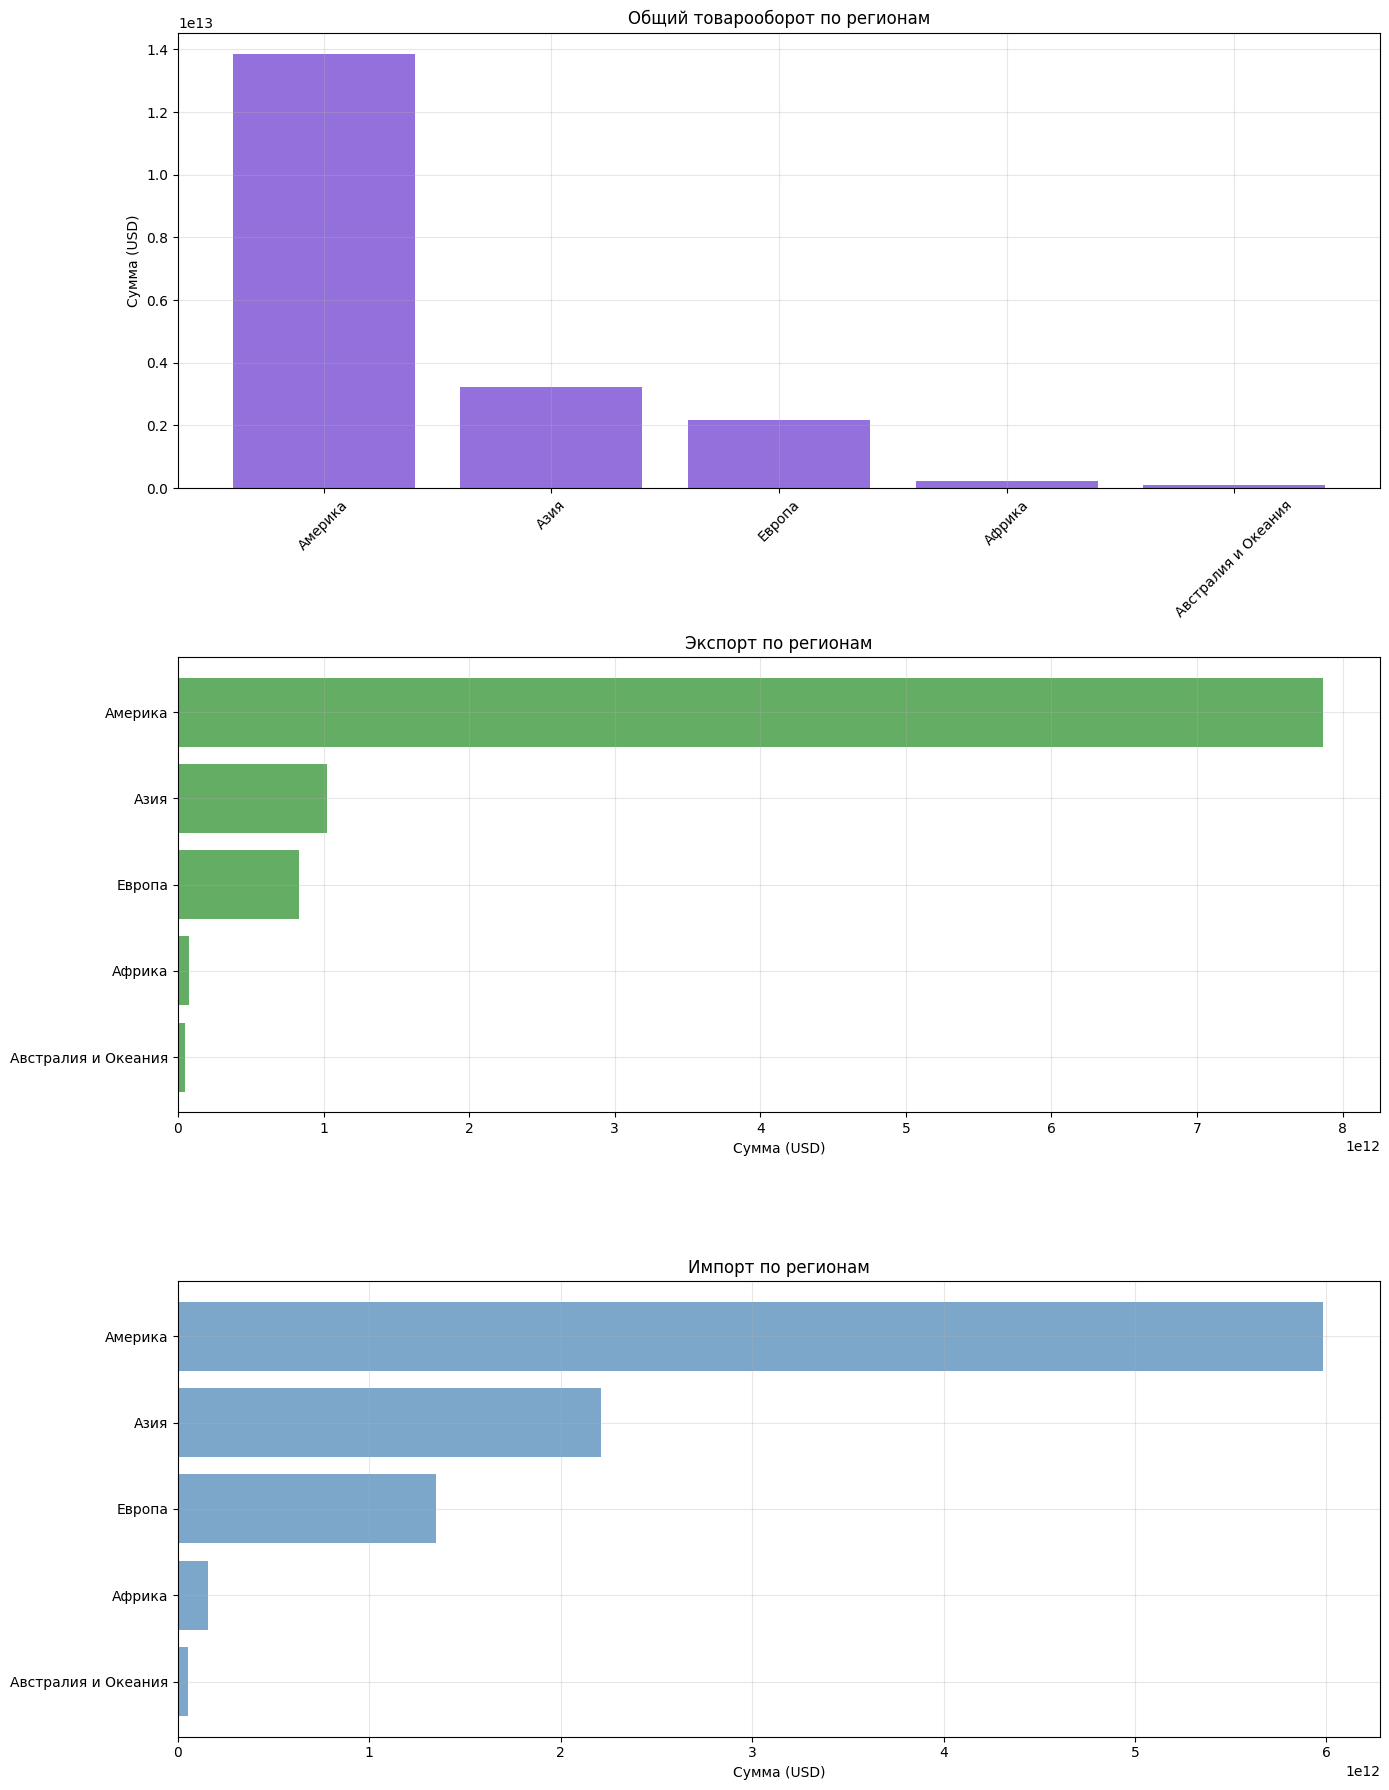


--- Итоги анализа по регионам ---
Лидирующий регион по общему товарообороту: Америка (70.65%)
Ведущий регион по экспорту: Америка (79.89%)
Главный регион по импорту: Америка (61.33%)

Регионы с положительным торговым сальдо:
 - Америка: 1,881,677,482,375.6367 USD

Регионы с отрицательным торговым сальдо:
 - Азия: -1,186,967,353,663.162 USD
 - Европа: -514,652,296,335.5039 USD
 - Африка: -84,589,436,557.276 USD
 - Австралия и Океания: -4,754,239,873.318001 USD

Доля топ-3 регионов в общем товарообороте: 98.3%

Общий объем торговли: 19,595,665,087,220 USD
Объем экспорта: 9,843,189,621,583 USD
Объем импорта: 9,752,475,465,637 USD
Общее торговое сальдо: 90,714,155,946 USD


In [19]:
# 4. Приоритетные регионы в международной торговле — альтернативный подход

print("### Анализ распределения торговли по регионам мира ###")

# Собираем данные по регионам: суммируем экспорт и импорт вместе
total_trade_region = full_trade_data.groupby('world_part')['primaryValue'].sum()
total_trade_region = total_trade_region.sort_values(ascending=False)

# Подсчет общего объема для долей
total_trade_sum = total_trade_region.sum()
trade_percent_region = (total_trade_region / total_trade_sum * 100).round(2)

# Формируем сводную таблицу для общей торговли
overall_trade_df = pd.DataFrame({
    'Регион': total_trade_region.index,
    'Объем торговли (USD)': total_trade_region.values,
    'Доля в общем товарообороте (%)': trade_percent_region.values
})

print("\nОбщий торговый оборот по регионам:")
display(overall_trade_df)

# Экспорт по регионам
export_df = full_trade_data[full_trade_data['flowCode'] == 'X']
export_region_sum = export_df.groupby('world_part')['primaryValue'].sum()
export_region_sum = export_region_sum.sort_values(ascending=False)
export_total = export_region_sum.sum()
export_percent = (export_region_sum / export_total * 100).round(2)

export_summary = pd.DataFrame({
    'Регион': export_region_sum.index,
    'Объем экспорта (USD)': export_region_sum.values,
    'Доля в экспорте (%)': export_percent.values
})

print("\nЭкспорт по регионам:")
display(export_summary)

# Импорт по регионам
import_df = full_trade_data[full_trade_data['flowCode'] == 'M']
import_region_sum = import_df.groupby('world_part')['primaryValue'].sum()
import_region_sum = import_region_sum.sort_values(ascending=False)
import_total = import_region_sum.sum()
import_percent = (import_region_sum / import_total * 100).round(2)

import_summary = pd.DataFrame({
    'Регион': import_region_sum.index,
    'Объем импорта (USD)': import_region_sum.values,
    'Доля в импорте (%)': import_percent.values
})

print("\nИмпорт по регионам:")
display(import_summary)

# Объединяем данные для сравнения
region_comparison = pd.DataFrame({
    'Экспорт (USD)': export_region_sum,
    'Импорт (USD)': import_region_sum
}).fillna(0)

region_comparison['Общий товарооборот (USD)'] = region_comparison['Экспорт (USD)'] + region_comparison['Импорт (USD)']
region_comparison['Торговое сальдо (USD)'] = region_comparison['Экспорт (USD)'] - region_comparison['Импорт (USD)']

region_comparison = region_comparison.sort_values(by='Общий товарооборот (USD)', ascending=False)

# Добавим колонки с долями (используем ранее посчитанные)
region_comparison['Доля в экспорте (%)'] = (region_comparison['Экспорт (USD)'] / export_total * 100).round(2)
region_comparison['Доля в импорте (%)'] = (region_comparison['Импорт (USD)'] / import_total * 100).round(2)

print("\nСравнительный анализ торговли по регионам:")
display(region_comparison)

# Визуализация: торговля по регионам
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# Общий товарооборот
axs[0].bar(region_comparison.index, region_comparison['Общий товарооборот (USD)'], color='mediumpurple')
axs[0].set_title('Общий товарооборот по регионам')
axs[0].set_ylabel('Сумма (USD)')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(alpha=0.3)

# Экспорт по регионам
axs[1].barh(export_summary['Регион'], export_summary['Объем экспорта (USD)'], color='forestgreen', alpha=0.7)
axs[1].set_title('Экспорт по регионам')
axs[1].set_xlabel('Сумма (USD)')
axs[1].invert_yaxis()
axs[1].grid(alpha=0.3)

# Импорт по регионам
axs[2].barh(import_summary['Регион'], import_summary['Объем импорта (USD)'], color='steelblue', alpha=0.7)
axs[2].set_title('Импорт по регионам')
axs[2].set_xlabel('Сумма (USD)')
axs[2].invert_yaxis()
axs[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Ключевые итоги
print("\n--- Итоги анализа по регионам ---")

top_total = overall_trade_df.iloc[0]
top_export = export_summary.iloc[0]
top_import = import_summary.iloc[0]

print(f"Лидирующий регион по общему товарообороту: {top_total['Регион']} ({top_total['Доля в общем товарообороте (%)']}%)")
print(f"Ведущий регион по экспорту: {top_export['Регион']} ({top_export['Доля в экспорте (%)']}%)")
print(f"Главный регион по импорту: {top_import['Регион']} ({top_import['Доля в импорте (%)']}%)")

positive_balance_regions = region_comparison[region_comparison['Торговое сальдо (USD)'] > 0]
negative_balance_regions = region_comparison[region_comparison['Торговое сальдо (USD)'] < 0]

print("\nРегионы с положительным торговым сальдо:")
for region, row in positive_balance_regions.iterrows():
    print(f" - {region}: {row['Торговое сальдо (USD)']:,} USD")

print("\nРегионы с отрицательным торговым сальдо:")
for region, row in negative_balance_regions.iterrows():
    print(f" - {region}: {row['Торговое сальдо (USD)']:,} USD")

top3_share = overall_trade_df.head(3)['Доля в общем товарообороте (%)'].sum()
print(f"\nДоля топ-3 регионов в общем товарообороте: {top3_share:.1f}%")

print(f"\nОбщий объем торговли: {total_trade_sum:,.0f} USD")
print(f"Объем экспорта: {export_total:,.0f} USD")
print(f"Объем импорта: {import_total:,.0f} USD")
print(f"Общее торговое сальдо: {(export_total - import_total):,.0f} USD")



=== ТОРГОВЛЯ ПО РЕГИОНАМ ПО ГОДАМ (АЛЬТЕРНАТИВА) ===


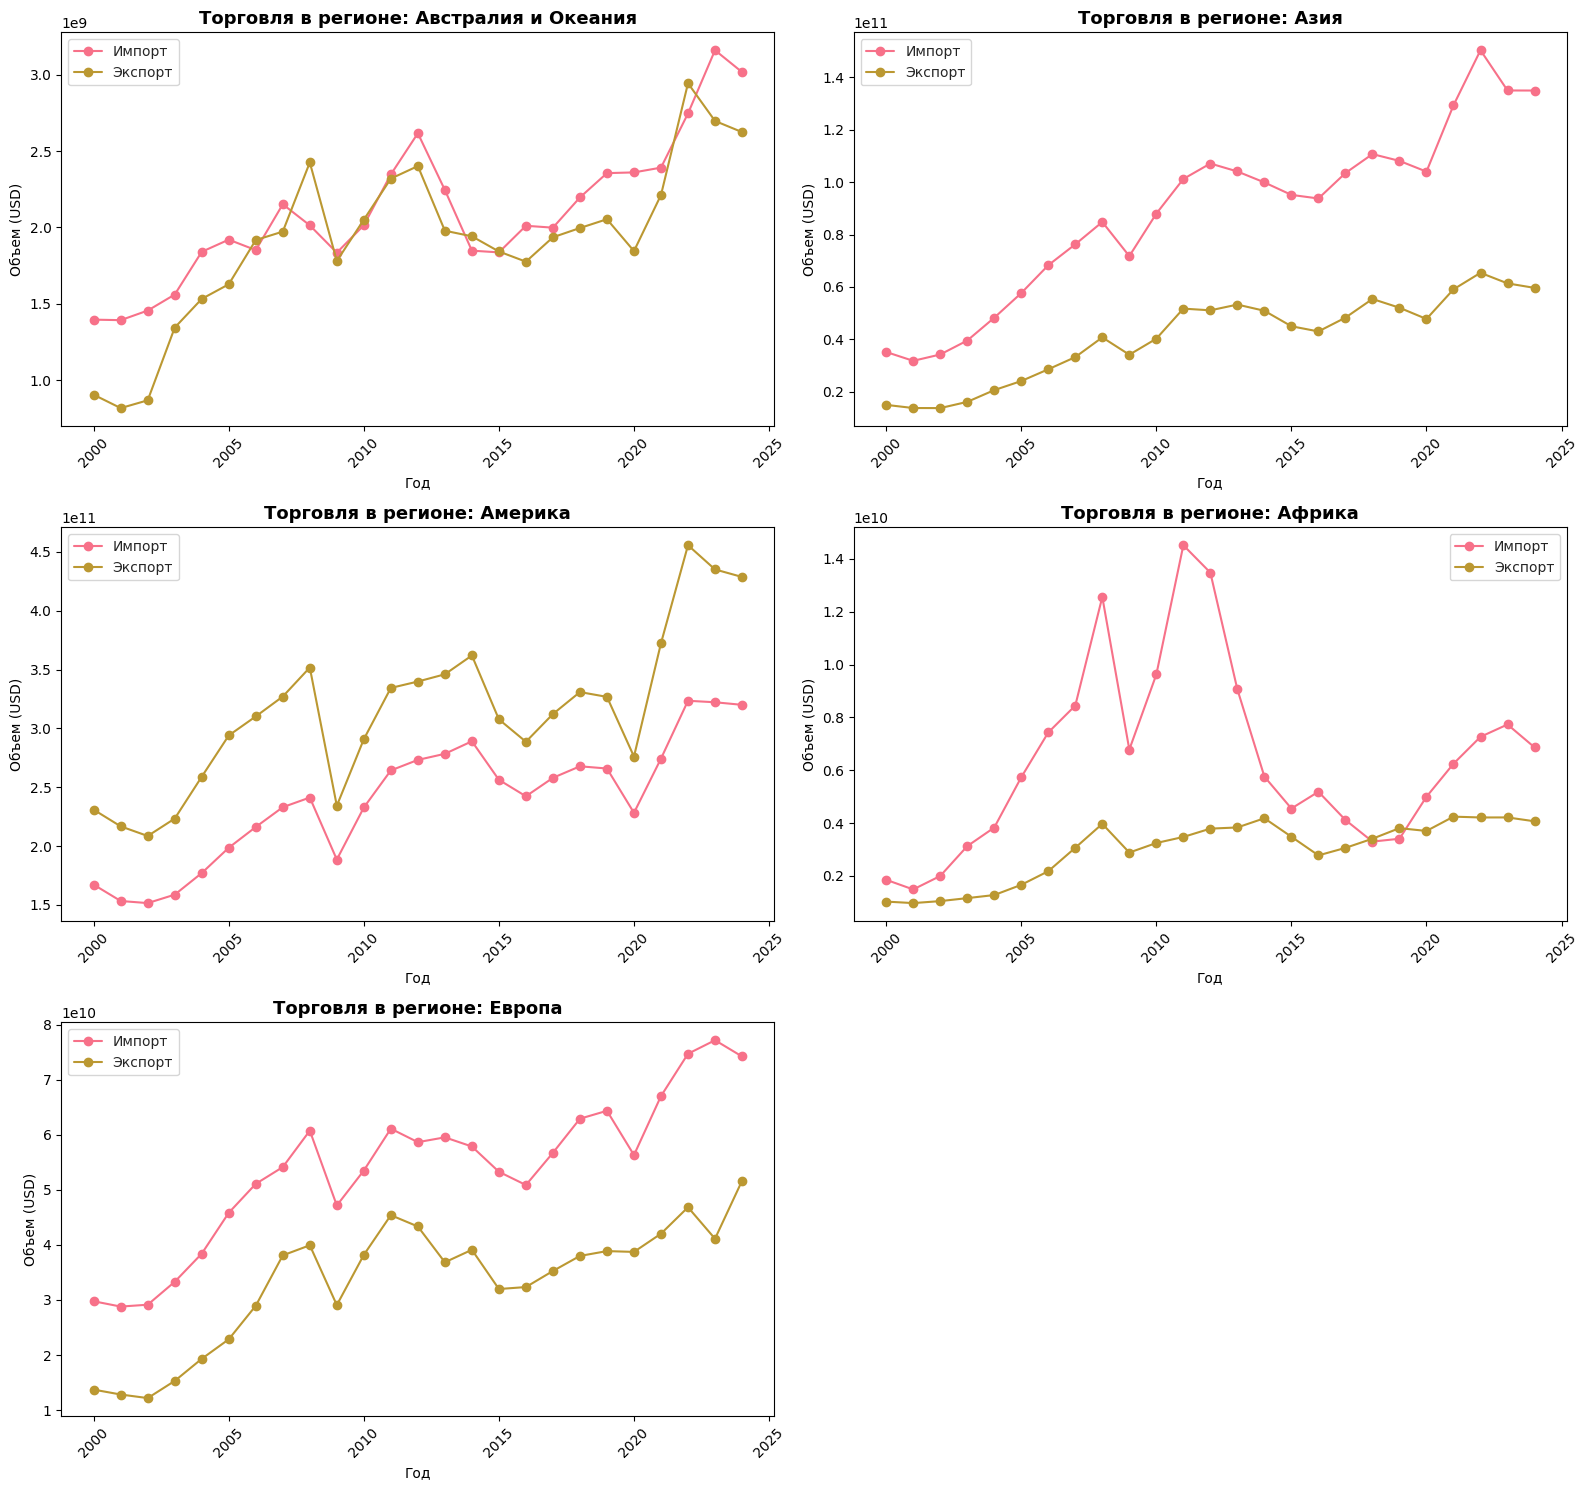


=== АНАЛИЗ СРЕДНЕДОЛГОСРОЧНЫХ ТЕМПОВ РОСТА (CAGR) ===
Среднегодовые темпы роста торговли по регионам за период 2000–2024:

                     CAGR Экспорт (%)  CAGR Импорт (%)
Австралия и Океания                 5                3
Азия                                6                6
Америка                             3                3
Африка                              6                6
Европа                              6                4


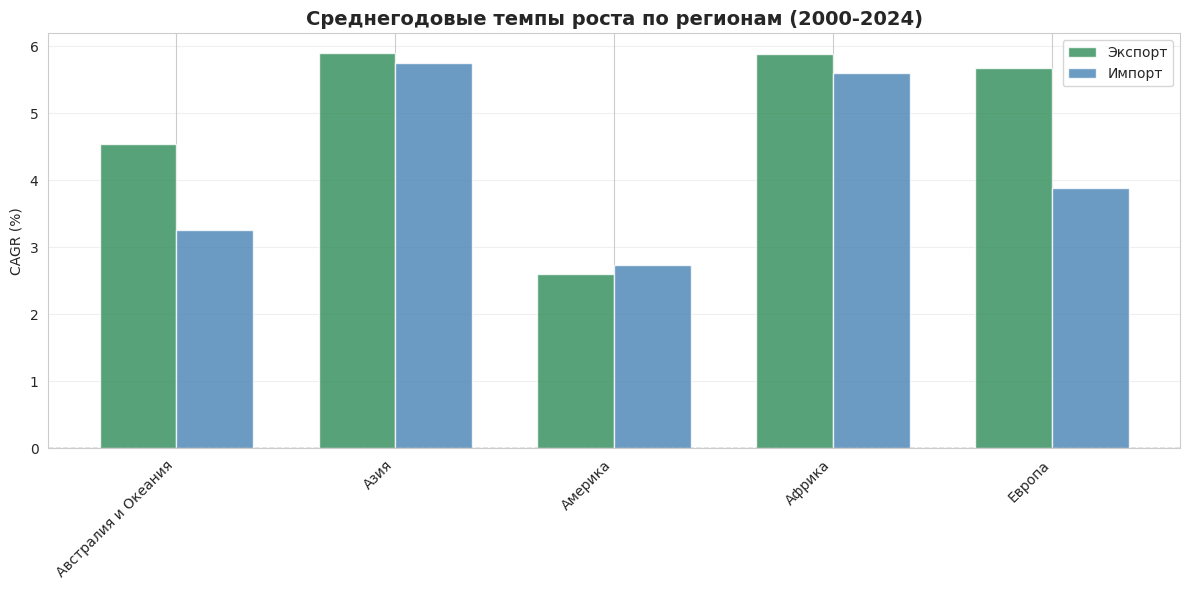

In [20]:
print("\n=== ТОРГОВЛЯ ПО РЕГИОНАМ ПО ГОДАМ (АЛЬТЕРНАТИВА) ===")

# Собираем данные с суммированием по году, региону и направлению торговли
trade_agg = (full_trade_data
             .groupby(['period', 'world_part', 'flowCode'], as_index=False)
             .agg({'primaryValue': 'sum'}))

# Обозначаем экспорты и импорты понятнее
trade_agg['flowCode'] = trade_agg['flowCode'].replace({'X': 'Экспорт', 'M': 'Импорт'})

regions_list = trade_agg['world_part'].unique()
num_regions = len(regions_list)

# Настраиваем сетку для графиков: по 2 в ряд
cols = 2
rows = int(np.ceil(num_regions / cols))

fig, axs = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axs = axs.flatten() if num_regions > 1 else [axs]

sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

for idx, region in enumerate(regions_list):
    ax = axs[idx]
    data_region = trade_agg[trade_agg['world_part'] == region]

    for flow_type, group in data_region.groupby('flowCode'):
        ax.plot(group['period'], group['primaryValue'], marker='o', label=flow_type)

    ax.set_title(f'Торговля в регионе: {region}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Год')
    ax.set_ylabel('Объем (USD)')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Удаляем лишние оси, если графиков меньше, чем ячеек сетки
for empty_ax in axs[num_regions:]:
    fig.delaxes(empty_ax)

plt.tight_layout()
plt.show()

print("\n=== АНАЛИЗ СРЕДНЕДОЛГОСРОЧНЫХ ТЕМПОВ РОСТА (CAGR) ===")

# Создаем сводные таблицы по экспорту и импорту: регионы x годы
pivot_exp = trade_agg[trade_agg['flowCode'] == 'Экспорт'].pivot(index='world_part', columns='period', values='primaryValue').fillna(0)
pivot_imp = trade_agg[trade_agg['flowCode'] == 'Импорт'].pivot(index='world_part', columns='period', values='primaryValue').fillna(0)

def calc_cagr(start, end, n):
    if start <= 0 or n == 0:
        return 0
    return (end/start)**(1/n) - 1

if pivot_exp.shape[1] > 1:
    start_year = pivot_exp.columns.min()
    end_year = pivot_exp.columns.max()
    period_count = end_year - start_year

    cagr_df = pd.DataFrame(index=regions_list)

    cagr_df['CAGR Экспорт (%)'] = [
        calc_cagr(pivot_exp.loc[region, start_year], pivot_exp.loc[region, end_year], period_count)*100
        for region in regions_list
    ]

    cagr_df['CAGR Импорт (%)'] = [
        calc_cagr(pivot_imp.loc[region, start_year], pivot_imp.loc[region, end_year], period_count)*100
        for region in regions_list
    ]

    cagr_df = cagr_df.round(2)
    print(f"Среднегодовые темпы роста торговли по регионам за период {start_year}–{end_year}:\n")
    print(cagr_df)

    # Визуализация CAGR по регионам
    fig, ax = plt.subplots(figsize=(12, 6))

    indices = np.arange(len(regions_list))
    width = 0.35

    ax.bar(indices - width/2, cagr_df['CAGR Экспорт (%)'], width, label='Экспорт', color='seagreen', alpha=0.8)
    ax.bar(indices + width/2, cagr_df['CAGR Импорт (%)'], width, label='Импорт', color='steelblue', alpha=0.8)

    ax.axhline(0, color='grey', linewidth=1, linestyle='--')
    ax.set_xticks(indices)
    ax.set_xticklabels(regions_list, rotation=45, ha='right')
    ax.set_ylabel('CAGR (%)')
    ax.set_title(f'Среднегодовые темпы роста по регионам ({start_year}-{end_year})', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("Недостаточно данных для расчета CAGR.")


***5. Какие страны-партнёры были основными по объёму торговли?***



*  a) Сформируйте топ-10 стран по суммарному объёму торговли за последние 5 лет.
*   b) Определите положительное или отрицательное сальдо с этими странами.


=== ТОП-10 СТРАН-ПАРТНЕРОВ ПО ОБЪЕМУ ТОРГОВЛИ ЗА ПОСЛЕДНИЕ 5 ЛЕТ ===
Рассматриваем период: [2020, 2021, 2022, 2023, 2024]
Топ-10 стран-партнеров:


,Ранг,Страна-партнер,Объем торговли (доллары),Доля от общего объема (%)
0,1,США,"3,113,713,187,048",62
1,2,Китай,"439,935,669,252",9
2,3,Мексика,"179,461,502,858",4
3,4,Япония,"122,480,361,458",2
4,5,Великобритания,"104,671,097,907",2
5,6,Германия,"102,492,624,824",2
6,7,Республика Корея,"73,775,239,471",1
7,8,Италия,"53,995,997,997",1
8,9,Вьетнам,"47,332,853,930",1
9,10,Франция,"44,879,418,884",1



=== АНАЛИЗ ТОРГОВОГО САЛЬДО С ТОП-10 СТРАНАМИ ===
Торговое сальдо с топ-10 странами-партнерами:
flowCode      partner_name           Экспорт            Импорт  \
0                      США 1,897,006,394,179 1,216,706,792,869   
1                    Китай   107,482,330,636   332,453,338,616   
2                  Мексика    30,622,992,390   148,838,510,469   
3                   Япония    56,757,816,005    65,722,545,453   
4           Великобритания    73,122,374,764    31,548,723,143   
5                 Германия    22,420,588,438    80,072,036,386   
6         Республика Корея    25,731,311,001    48,043,928,470   
7                   Италия    11,387,485,674    42,608,512,323   
8                  Вьетнам     3,074,533,853    44,258,320,077   
9                  Франция    15,200,259,360    29,679,159,525   

flowCode      Товарооборот  Торговое сальдо Характер сальдо  \
0        3,113,713,187,048  680,299,601,310   Положительное   
1          439,935,669,252 -224,971,007,980   Отри

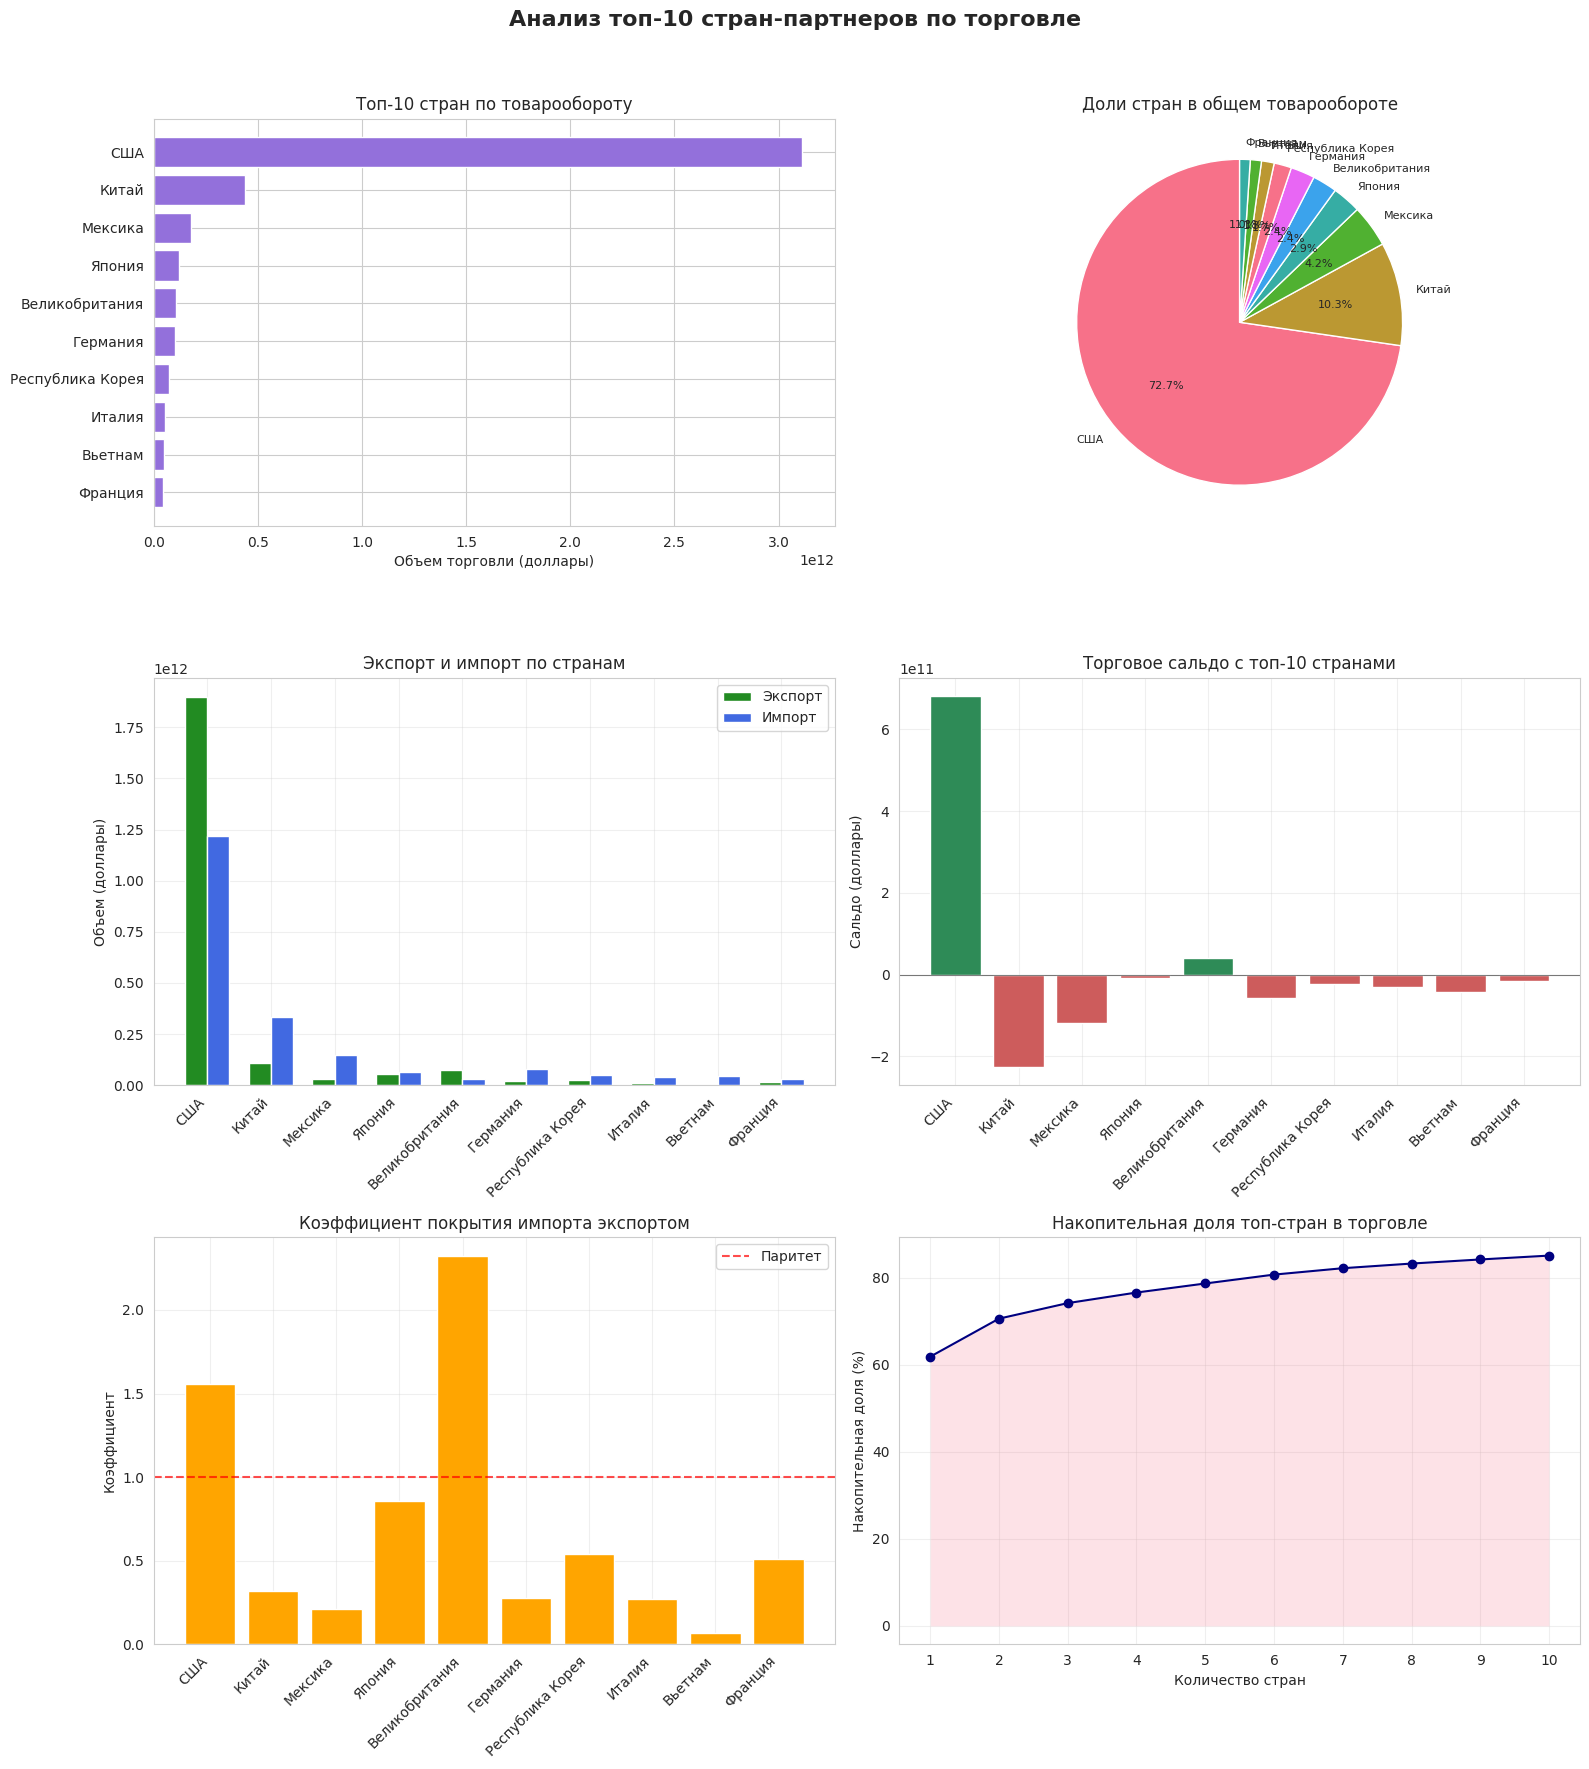


=== ИТОГОВЫЙ АНАЛИЗ ТОРГОВОГО САЛЬДО ===
Страны с положительным торговым сальдо:
 - США: 680,299,601,310 USD
 - Великобритания: 41,573,651,622 USD

Страны с отрицательным торговым сальдо:
 - Китай: -224,971,007,980 USD
 - Мексика: -118,215,518,079 USD
 - Германия: -57,651,447,948 USD
 - Вьетнам: -41,183,786,224 USD
 - Италия: -31,221,026,649 USD
 - Республика Корея: -22,312,617,469 USD
 - Франция: -14,478,900,165 USD
 - Япония: -8,964,729,448 USD

Общий экспорт по топ-10: 2,242,806,086,300 USD
Общий импорт по топ-10: 2,039,931,867,330 USD
Общее торговое сальдо: 202,874,218,969 USD
Общий коэффициент покрытия: 1.099
Доля топ-10 стран в общем товарообороте: 85.1%

=== КЛЮЧЕВЫЕ ВЫВОДЫ ===
1. Основной партнер: США — 61.87% от торговли, объем 3,113,713,187,048 USD
2. Концентрация: топ-3 страны занимают 74.2% от всего товарооборота
3. Торговый баланс: 2 стран с профицитом, 8 с дефицитом


In [21]:
# 5. Анализ стран-партнеров по объему торговли (альтернативный вариант)

print("=== ТОП-10 СТРАН-ПАРТНЕРОВ ПО ОБЪЕМУ ТОРГОВЛИ ЗА ПОСЛЕДНИЕ 5 ЛЕТ ===")

# Вычисляем последние 5 лет из данных
latest_year = full_trade_data['period'].max()
years_to_consider = [year for year in range(latest_year - 4, latest_year + 1)]
print(f"Рассматриваем период: {years_to_consider}")

# Фильтрация данных за последние 5 лет
data_recent = full_trade_data.loc[full_trade_data['period'].isin(years_to_consider)]

# Суммарный объем торговли по странам-партнерам
trade_sum_by_partner = data_recent.groupby('partner_name')['primaryValue'].sum()

# Топ-10 стран по объему торговли
top_partners = trade_sum_by_partner.sort_values(ascending=False).head(10).to_frame(name='total_trade')

# Добавляем процентную долю от общего объема
total_trade_all = trade_sum_by_partner.sum()
top_partners['trade_share_%'] = (top_partners['total_trade'] / total_trade_all * 100).round(2)

# Добавляем ранжирование
top_partners['rank'] = range(1, len(top_partners) + 1)

# Переставляем столбцы для удобства
top_partners = top_partners.reset_index()[['rank', 'partner_name', 'total_trade', 'trade_share_%']]
top_partners.columns = ['Ранг', 'Страна-партнер', 'Объем торговли (доллары)', 'Доля от общего объема (%)']

print("Топ-10 стран-партнеров:")
display(top_partners)

print("\n=== АНАЛИЗ ТОРГОВОГО САЛЬДО С ТОП-10 СТРАНАМИ ===")

# Фильтруем данные по топ-10 странам
partners_list = top_partners['Страна-партнер'].tolist()
filtered_data = data_recent[data_recent['partner_name'].isin(partners_list)]

# Группируем по стране и типу торговли, суммируем объемы
trade_by_flow = filtered_data.pivot_table(
    index='partner_name',
    columns='flowCode',
    values='primaryValue',
    aggfunc='sum',
    fill_value=0
)

# Добавляем колонки экспорта и импорта с понятными названиями
trade_by_flow = trade_by_flow.rename(columns={'X': 'Экспорт', 'M': 'Импорт'})

# Вычисляем торговое сальдо
trade_by_flow['Торговое сальдо'] = trade_by_flow['Экспорт'] - trade_by_flow['Импорт']

# Общий товарооборот
trade_by_flow['Товарооборот'] = trade_by_flow['Экспорт'] + trade_by_flow['Импорт']

# Характер сальдо
trade_by_flow['Характер сальдо'] = trade_by_flow['Торговое сальдо'].apply(
    lambda x: 'Положительное' if x > 0 else ('Отрицательное' if x < 0 else 'Нулевое')
)

# Коэффициент покрытия импорта экспортом (с защитой от деления на 0)
trade_by_flow['Коэффициент покрытия'] = (trade_by_flow['Экспорт'] / trade_by_flow['Импорт'].replace(0, 1)).round(3)

# Сортируем по товарообороту по убыванию
trade_by_flow = trade_by_flow.sort_values(by='Товарооборот', ascending=False)

# Округляем для вывода
trade_by_flow_rounded = trade_by_flow.round(2).reset_index()

print("Торговое сальдо с топ-10 странами-партнерами:")
print(trade_by_flow_rounded[[
    'partner_name', 'Экспорт', 'Импорт', 'Товарооборот',
    'Торговое сальдо', 'Характер сальдо', 'Коэффициент покрытия'
]])

# Визуализация
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Анализ топ-10 стран-партнеров по торговле', fontsize=16, fontweight='bold')

# 1) Бар-график: объем торговли по странам
axs[0, 0].barh(top_partners['Страна-партнер'], top_partners['Объем торговли (доллары)'], color='mediumpurple')
axs[0, 0].invert_yaxis()
axs[0, 0].set_xlabel('Объем торговли (доллары)')
axs[0, 0].set_title('Топ-10 стран по товарообороту')

# 2) Круговая диаграмма: доли в общем объеме
axs[0, 1].pie(top_partners['Доля от общего объема (%)'], labels=top_partners['Страна-партнер'],
              autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
axs[0, 1].set_title('Доли стран в общем товарообороте')

# 3) Экспорт и импорт по странам
x = range(len(trade_by_flow_rounded))
width = 0.35
axs[1, 0].bar([pos - width/2 for pos in x], trade_by_flow_rounded['Экспорт'], width, label='Экспорт', color='forestgreen')
axs[1, 0].bar([pos + width/2 for pos in x], trade_by_flow_rounded['Импорт'], width, label='Импорт', color='royalblue')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(trade_by_flow_rounded['partner_name'], rotation=45, ha='right')
axs[1, 0].set_ylabel('Объем (доллары)')
axs[1, 0].set_title('Экспорт и импорт по странам')
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.3)

# 4) Торговое сальдо (цвета в зависимости от знака)
axs[1, 1].bar(trade_by_flow_rounded['partner_name'], trade_by_flow_rounded['Торговое сальдо'],
              color=['seagreen' if val > 0 else 'indianred' for val in trade_by_flow_rounded['Торговое сальдо']])
axs[1, 1].axhline(0, color='black', linewidth=0.8, alpha=0.5)
axs[1, 1].set_xticks(range(len(trade_by_flow_rounded)))
axs[1, 1].set_xticklabels(trade_by_flow_rounded['partner_name'], rotation=45, ha='right')
axs[1, 1].set_title('Торговое сальдо с топ-10 странами')
axs[1, 1].set_ylabel('Сальдо (доллары)')
axs[1, 1].grid(alpha=0.3)

# 5) Коэффициент покрытия импорта экспортом
axs[2, 0].bar(trade_by_flow_rounded['partner_name'], trade_by_flow_rounded['Коэффициент покрытия'], color='orange')
axs[2, 0].axhline(1, color='red', linestyle='--', alpha=0.7, label='Паритет')
axs[2, 0].set_xticks(range(len(trade_by_flow_rounded)))
axs[2, 0].set_xticklabels(trade_by_flow_rounded['partner_name'], rotation=45, ha='right')
axs[2, 0].set_title('Коэффициент покрытия импорта экспортом')
axs[2, 0].set_ylabel('Коэффициент')
axs[2, 0].legend()
axs[2, 0].grid(alpha=0.3)

# 6) Накопительная доля торговли топ-10 стран
cumulative = top_partners['Доля от общего объема (%)'].cumsum()
axs[2, 1].plot(range(1, len(cumulative) + 1), cumulative, marker='o', color='navy')
axs[2, 1].fill_between(range(1, len(cumulative) + 1), cumulative, alpha=0.2)
axs[2, 1].set_xticks(range(1, len(cumulative) + 1))
axs[2, 1].set_title('Накопительная доля топ-стран в торговле')
axs[2, 1].set_xlabel('Количество стран')
axs[2, 1].set_ylabel('Накопительная доля (%)')
axs[2, 1].grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Итоговый анализ торгового сальдо
print("\n=== ИТОГОВЫЙ АНАЛИЗ ТОРГОВОГО САЛЬДО ===")

# Положительное сальдо (профицит)
profitable = trade_by_flow_rounded[trade_by_flow_rounded['Торговое сальдо'] > 0].sort_values('Торговое сальдо', ascending=False)
if not profitable.empty:
    print("Страны с положительным торговым сальдо:")
    for _, row in profitable.iterrows():
        print(f" - {row['partner_name']}: {row['Торговое сальдо']:,.0f} USD")

# Отрицательное сальдо (дефицит)
deficit = trade_by_flow_rounded[trade_by_flow_rounded['Торговое сальдо'] < 0].sort_values('Торговое сальдо')
if not deficit.empty:
    print("\nСтраны с отрицательным торговым сальдо:")
    for _, row in deficit.iterrows():
        print(f" - {row['partner_name']}: {row['Торговое сальдо']:,.0f} USD")

# Итоги по топ-10
total_exp = trade_by_flow['Экспорт'].sum()
total_imp = trade_by_flow['Импорт'].sum()
total_bal = trade_by_flow['Торговое сальдо'].sum()

print(f"\nОбщий экспорт по топ-10: {total_exp:,.0f} USD")
print(f"Общий импорт по топ-10: {total_imp:,.0f} USD")
print(f"Общее торговое сальдо: {total_bal:,.0f} USD")
print(f"Общий коэффициент покрытия: {(total_exp / total_imp):.3f}")
print(f"Доля топ-10 стран в общем товарообороте: {top_partners['Доля от общего объема (%)'].sum():.1f}%")

print("\n=== КЛЮЧЕВЫЕ ВЫВОДЫ ===")
top1 = top_partners.iloc[0]
print(f"1. Основной партнер: {top1['Страна-партнер']} — {top1['Доля от общего объема (%)']}% от торговли, объем {top1['Объем торговли (доллары)']:,.0f} USD")
top3_sum = top_partners.head(3)['Доля от общего объема (%)'].sum()
print(f"2. Концентрация: топ-3 страны занимают {top3_sum:.1f}% от всего товарооборота")
print(f"3. Торговый баланс: {len(profitable)} стран с профицитом, {len(deficit)} с дефицитом")


***6. Кто был ключевым торговым партнёром в последнем году?***



*   a) Назовите страну с наибольшим товарооборотом.
*   b) Опишите структуру экспорта и импорта с этой страной.




=== АНАЛИЗ КЛЮЧЕВОГО ТОРГОВОГО ПАРТНЕРА ЗА ПОСЛЕДНИЙ ГОД ===
Рассматриваемый период: 2024
Наибольший товарооборот в 2024 году с: США
Общий товарооборот: 675,951,212,979 долларов США

Топ-10 торговых партнеров по итогам года:
             Страна    Товарооборот  Доля_в_торговле (%)
0               США 675,951,212,979                   62
1             Китай  85,686,819,904                    8
2           Мексика  40,343,966,706                    4
3    Великобритания  27,132,277,324                    2
4            Япония  25,958,798,190                    2
5          Германия  21,434,862,936                    2
6  Республика Корея  17,724,646,445                    2
7           Вьетнам  11,368,693,214                    1
8            Италия  11,264,899,388                    1
9           Франция  10,134,647,692                    1

=== СТРУКТУРА ТОРГОВЛИ С США ===
Экспорт в США: 414,576,268,509 USD
Импорт из США: 261,374,944,470 USD
Торговое сальдо: 153,201,324,038 USD
Доля СШ

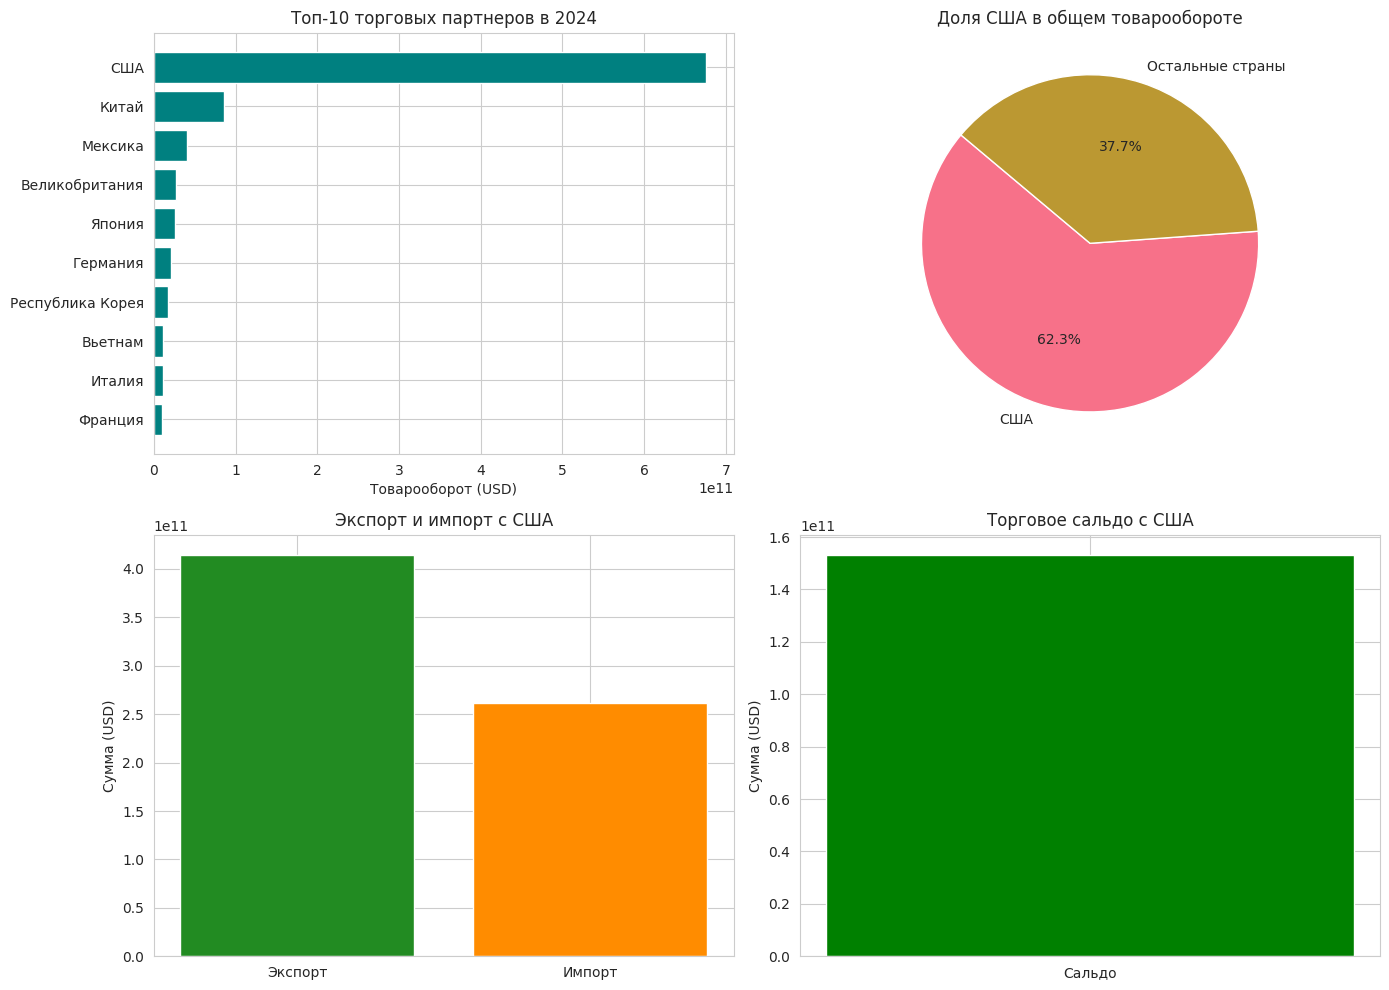


=== АНАЛИЗ ТОРГОВЛИ ПО СЕКТОРАМ ЭКОНОМИКИ С США ===
Статистика по секторам экономики:
flowCode                                                  Импорт  \
economic_sector                                                    
Машиностроение и электроника                     110,542,294,295   
Топливно-энергетический комплекс                  26,753,150,220   
Сельское хозяйство и пищевая промышленность       28,167,942,734   
Химическая промышленность                         26,655,349,700   
Металлургия и металлообработка                    17,504,086,996   
Пластмассы, резина и изделия из них               16,326,917,071   
Минеральные материалы и изделия из них             9,146,231,324   
Целлюлозно-бумажная промышленность                 7,095,645,097   
Кожевенная и деревообрабатывающая промышленность   2,324,803,853   
Приборостроение и высокие технологии               6,746,597,197   
Промтовары и мебель                                4,503,688,466   
Строительные материалы и сырь

In [22]:
print("=== АНАЛИЗ КЛЮЧЕВОГО ТОРГОВОГО ПАРТНЕРА ЗА ПОСЛЕДНИЙ ГОД ===")

# Определяем последний год из датасета
год_последний = full_trade_data['period'].max()
print(f"Рассматриваемый период: {год_последний}")

# Отбираем данные только за последний год
данные_год = full_trade_data.query("period == @год_последний")

# Считаем общий товарооборот по каждой стране
оборот_по_странам = данные_год.groupby('partner_name')['primaryValue'].sum()
оборот_по_странам = оборот_по_странам.sort_values(ascending=False)

# Выбираем страну с максимальным товарооборотом
топ_страна = оборот_по_странам.index[0]
топ_оборот = оборот_по_странам.iloc[0]

print(f"Наибольший товарооборот в {год_последний} году с: {топ_страна}")
print(f"Общий товарооборот: {топ_оборот:,.0f} долларов США")

# Показываем топ-10 партнеров для контекста
топ10 = оборот_по_странам.head(10).reset_index()
топ10.columns = ['Страна', 'Товарооборот']
сумма_всех = оборот_по_странам.sum()
топ10['Доля_в_торговле (%)'] = (топ10['Товарооборот'] / сумма_всех * 100).round(2)

print("\nТоп-10 торговых партнеров по итогам года:")
print(топ10)

# Структура торговли с лидирующей страной
print(f"\n=== СТРУКТУРА ТОРГОВЛИ С {топ_страна.upper()} ===")

# Фильтруем данные для топовой страны
данные_страны = данные_год[данные_год['partner_name'] == топ_страна]

# Считаем экспорт и импорт
экспорт = данные_страны.loc[данные_страны['flowCode'] == 'X', 'primaryValue'].sum()
импорт = данные_страны.loc[данные_страны['flowCode'] == 'M', 'primaryValue'].sum()
сальдо = экспорт - импорт

print(f"Экспорт в {топ_страна}: {экспорт:,.0f} USD")
print(f"Импорт из {топ_страна}: {импорт:,.0f} USD")
print(f"Торговое сальдо: {сальдо:,.0f} USD")
print(f"Доля {топ_страна} в общем товарообороте: {(топ_оборот / сумма_всех * 100):.1f}%")

# Анализ экспорта: топ-10 товаров
экспорт_товары = (
    данные_страны.query("flowCode == 'X'")
    .groupby('commodity_name')['primaryValue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
экспорт_товары.columns = ['Товар', 'Объем экспорта']
экспорт_товары['Доля в экспорте (%)'] = (экспорт_товары['Объем экспорта'] / экспорт * 100).round(2)

# Анализ импорта: топ-10 товаров
импорт_товары = (
    данные_страны.query("flowCode == 'M'")
    .groupby('commodity_name')['primaryValue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
импорт_товары.columns = ['Товар', 'Объем импорта']
импорт_товары['Доля в импорте (%)'] = (импорт_товары['Объем импорта'] / импорт * 100).round(2)

print("\nТоп-10 экспортируемых товаров:")
print(экспорт_товары)

print("\nТоп-10 импортируемых товаров:")
print(импорт_товары)

# Визуализация

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# 1. Гистограмма топ-10 стран по товарообороту
plt.subplot(2, 2, 1)
plt.barh(топ10['Страна'], топ10['Товарооборот'], color='teal')
plt.gca().invert_yaxis()
plt.title(f'Топ-10 торговых партнеров в {год_последний}')
plt.xlabel('Товарооборот (USD)')

# 2. Круговая диаграмма доли топовой страны в общем товарообороте
plt.subplot(2, 2, 2)
доли = [топ_оборот, сумма_всех - топ_оборот]
метки = [топ_страна, 'Остальные страны']
plt.pie(доли, labels=метки, autopct='%1.1f%%', startangle=140)
plt.title(f'Доля {топ_страна} в общем товарообороте')

# 3. Экспорт и импорт с топовой страной
plt.subplot(2, 2, 3)
plt.bar(['Экспорт', 'Импорт'], [экспорт, импорт], color=['forestgreen', 'darkorange'])
plt.title(f'Экспорт и импорт с {топ_страна}')
plt.ylabel('Сумма (USD)')

# 4. Торговое сальдо
plt.subplot(2, 2, 4)
цвет_сальдо = 'green' if сальдо >= 0 else 'red'
plt.bar(['Сальдо'], [сальдо], color=цвет_сальдо)
plt.title(f'Торговое сальдо с {топ_страна}')
plt.ylabel('Сумма (USD)')

plt.tight_layout()
plt.show()

print(f"\n=== АНАЛИЗ ТОРГОВЛИ ПО СЕКТОРАМ ЭКОНОМИКИ С {топ_страна.upper()} ===")

# Сгруппируем по секторам и направлению торговли (экспорт/импорт)
сектора = данные_страны.pivot_table(
    values='primaryValue',
    index='economic_sector',
    columns='flowCode',
    aggfunc='sum',
    fill_value=0
)

# Переименуем колонки для удобства
сектора.rename(columns={'X': 'Экспорт', 'M': 'Импорт'}, inplace=True)

# Добавим итоги
сектора['Общий товарооборот'] = сектора['Экспорт'] + сектора['Импорт']
сектора['Торговое сальдо'] = сектора['Экспорт'] - сектора['Импорт']

# Отсортируем по объему товарооборота
сектора = сектора.sort_values(by='Общий товарооборот', ascending=False)

print("Статистика по секторам экономики:")
print(сектора.round(2))


# Ключевые выводы по результатам анализа
print(f"\n=== ОСНОВНЫЕ ВЫВОДЫ ПО ТОРГОВЛЕ С {топ_страна.upper()} ЗА {год_последний} ГОД ===")
print(f"1. {топ_страна} является главным торговым партнером с товарооборотом в {топ_оборот:,.0f} USD.")
print(f"2. Доля {топ_страна} в общем товарообороте составляет {(топ_оборот / сумма_всех * 100):.1f}%.")
print(f"3. Торговое сальдо {'положительное (профицит)' if сальдо > 0 else 'отрицательное (дефицит)'} и составляет {сальдо:,.0f} USD.")
print(f"4. Коэффициент покрытия импорта экспортом равен {экспорт / импорт:.2f}.")

if not экспорт_товары.empty:
    print(f"5. Ведущий экспортируемый товар — '{экспорт_товары.iloc[0]['Товар']}' с долей {экспорт_товары.iloc[0]['Доля в экспорте (%)']}% в экспорте.")

if not импорт_товары.empty:
    print(f"6. Главный импортируемый товар — '{импорт_товары.iloc[0]['Товар']}' с долей {импорт_товары.iloc[0]['Доля в импорте (%)']}% в импорте.")


***7. Какова динамика торговли с Российской Федерацией за последние 5 лет?***



*   a) Как изменялись экспорт и импорт по годам?



=== ДИНАМИКА ТОРГОВЛИ С КАНАДА ЗА ПОСЛЕДНИЕ 5 ЛЕТ ===
Анализ динамики торговли с Канада за 2020, 2021, 2022, 2023, 2024

Динамика экспорта и импорта с Канада по годам:


flowCode,Импорт,Экспорт,Торговое сальдо,Товарооборот
period,,,,
2000,"235,411,244,737","261,607,675,172","26,196,430,435","497,018,919,909"
2001,"216,832,017,788","245,217,574,539","28,385,556,751","462,049,592,327"
2002,"218,371,968,028","236,489,045,637","18,117,077,609","454,861,013,665"
2003,"236,264,489,605","257,370,724,764","21,106,235,159","493,635,214,369"
2004,"269,415,710,265","301,760,659,327","32,344,949,062","571,176,369,592"
2005,"309,751,695,955","344,329,136,154","34,577,440,199","654,080,832,109"
2006,"344,867,455,545","371,886,140,258","27,018,684,713","716,753,595,803"
2007,"374,040,823,846","403,530,317,204","29,489,493,358","777,571,141,050"
2008,"401,334,086,650","438,909,830,523","37,575,743,873","840,243,917,173"



Темпы роста по сравнению с предыдущим годом (%):
flowCode  Импорт  Экспорт  Торговое сальдо  Товарооборот
period                                                  
2000         NaN      NaN              NaN           NaN
2001          -8       -6                8            -7
2002           1       -4              -36            -2
2003           8        9               16             9
2004          14       17               53            16
2005          15       14                7            15
2006          11        8              -22            10
2007           8        9                9             8
2008           7        9               27             8
2009         -21      -31             -137           -26
2010          22       24              -19            23
2011          15       17              -46            16
2012           3        1              140             2
2013          -0        0              -22            -0
2014           0        4             

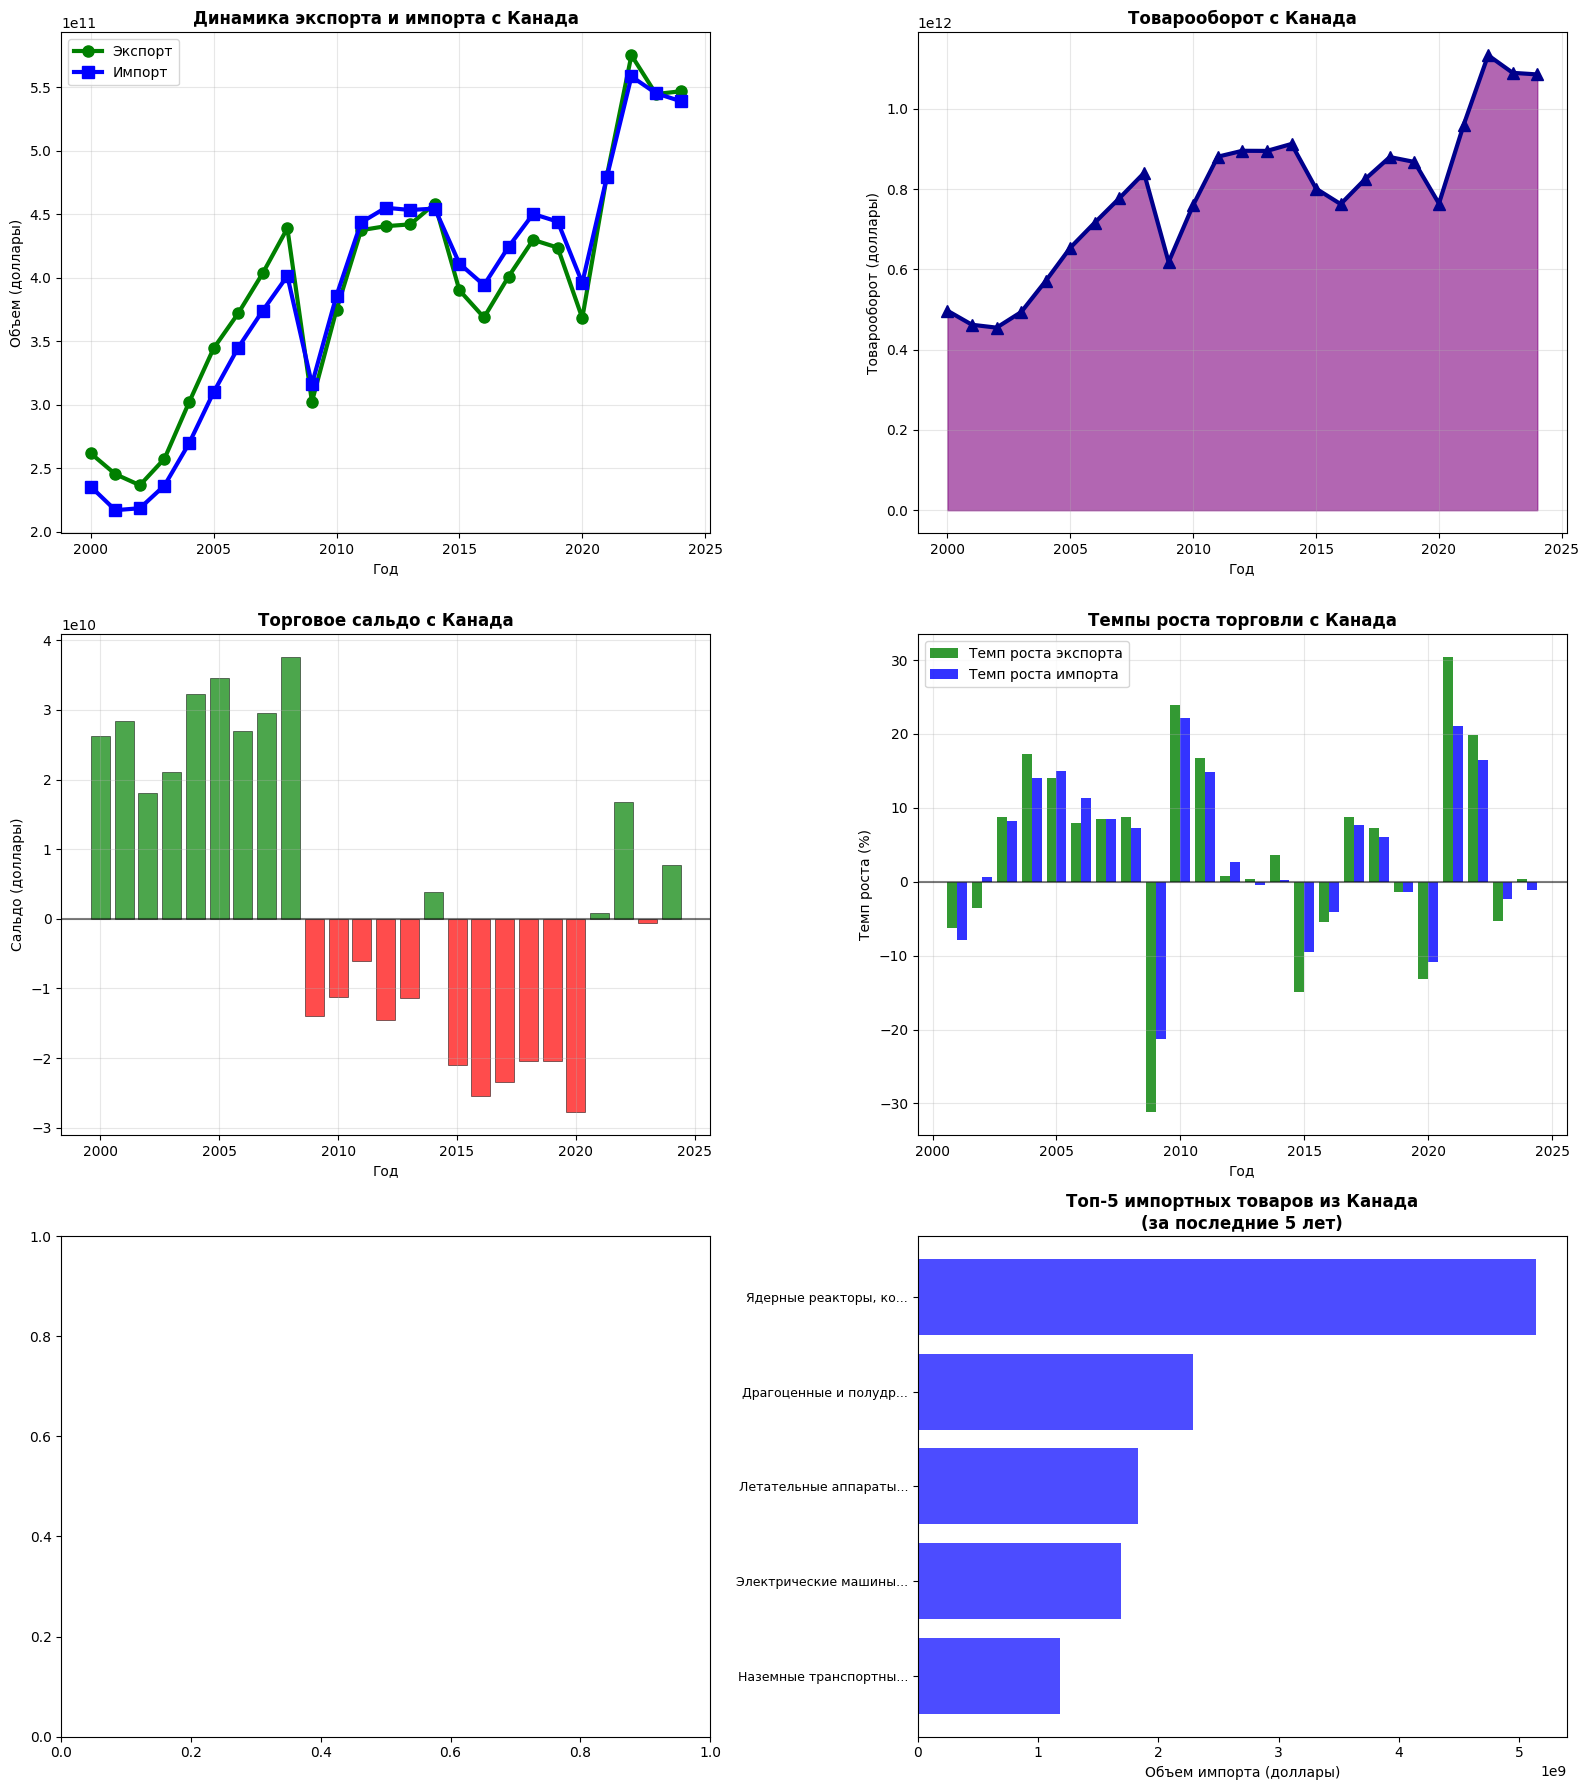


=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ТОРГОВЛИ С КАНАДА ===
Среднегодовые показатели за 5 лет:
  Экспорт: 393,749,107,102 долларов
  Импорт: 390,238,818,006 долларов
  Товарооборот: 783,987,925,109 долларов
  Торговое сальдо: 3,510,289,096 долларов

Среднегодовой темп роста экспорта (CAGR): 3.12%
Среднегодовой темп роста импорта (CAGR): 3.51%

=== КЛЮЧЕВЫЕ ВЫВОДЫ ===
1. Пиковый товарооборот: 1,133,657,036,920 долларов в 2022 году
2. Лет с положительным торговым сальдо: 13 из 25
4. Основной импортный товар: Ядерные реакторы, котлы, оборудование и механические устройства


In [49]:
# 7. Динамика торговли с указанной страной за последние 5 лет

country_name = "Канада"
print(f"=== ДИНАМИКА ТОРГОВЛИ С {country_name.upper()} ЗА ПОСЛЕДНИЕ 5 ЛЕТ ===")

last_5_years = [int(x) for x in unique_years[-5:]]

print(f"Анализ динамики торговли с {country_name} за {', '.join(map(str, last_5_years))}")


# Фильтруем данные по стране и последним 5 годам
country_data = full_trade_data[
    (full_trade_data['partner_name'] == country_name) &
    (full_trade_data['period'].isin(last_5_years))
]

if len(country_data) == 0:
    print(f"Данные по стране '{country_name}' не найдены. Проверьте правильность названия.")
    # Показываем доступные страны
    available_countries = full_trade_data['partner_name'].unique()[:20]
    print(f"Доступные страны (первые 20): {list(available_countries)}")
else:
    # a) Группируем по году и типу потока
    trade_dynamics = (
      full_trade_data
      .groupby(['period', 'flowCode'])['primaryValue']
      .sum()
      .unstack(fill_value=0)
      .rename(columns={'X': 'Экспорт', 'M': 'Импорт'})
    )

    # Округление значений
    trade_dynamics = trade_dynamics.round(2)

    # Добавляем расчетные показатели: торговое сальдо и товарооборот
    trade_dynamics['Торговое сальдо'] = trade_dynamics['Экспорт'] - trade_dynamics['Импорт']
    trade_dynamics['Товарооборот'] = trade_dynamics['Экспорт'] + trade_dynamics['Импорт']

    print(f"\nДинамика экспорта и импорта с {country_name} по годам:")
    display(trade_dynamics)

# Рассчитываем темпы роста
    trade_growth = trade_dynamics.pct_change() * 100
    print(f"\nТемпы роста по сравнению с предыдущим годом (%):")
    print(trade_growth.round(2))

    # Топ-5 товаров в торговле с этой страной за последние 5 лет
    top_export_goods = (country_data[country_data['flowCode'] == 'X']
                        .groupby('commodity_name')['primaryValue']
                        .sum()
                        .sort_values(ascending=False)
                        .head(5)
                        .reset_index())
    top_export_goods.columns = ['Товар', 'Объем экспорта (доллары)']

    top_import_goods = (country_data[country_data['flowCode'] == 'M']
                        .groupby('commodity_name')['primaryValue']
                        .sum()
                        .sort_values(ascending=False)
                        .head(5)
                        .reset_index())
    top_import_goods.columns = ['Товар', 'Объем импорта (доллары)']

    print(f"\nТоп-5 экспортных товаров в {country_name} за последние 5 лет:")
    print(top_export_goods)
    print(f"\nТоп-5 импортных товаров из {country_name} за последние 5 лет:")
    print(top_import_goods)

    # ВИЗУАЛИЗАЦИИ
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Настройка стиля
    plt.style.use('default')
    sns.set_palette("husl")

    # Создаем фигуру с подграфиками (3 строки, 2 столбца)
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))

    # График 1: Динамика экспорта и импорта
    axes[0, 0].plot(trade_dynamics.index, trade_dynamics['Экспорт'],
                    marker='o', label='Экспорт', linewidth=3, markersize=8, color='green')
    axes[0, 0].plot(trade_dynamics.index, trade_dynamics['Импорт'],
                    marker='s', label='Импорт', linewidth=3, markersize=8, color='blue')
    axes[0, 0].set_title(f'Динамика экспорта и импорта с {country_name}', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Год')
    axes[0, 0].set_ylabel('Объем (доллары)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # График 2: Товарооборот
    axes[0, 1].fill_between(trade_dynamics.index, trade_dynamics['Товарооборот'],
                            alpha=0.6, color='purple')
    axes[0, 1].plot(trade_dynamics.index, trade_dynamics['Товарооборот'],
                    marker='^', color='darkblue', linewidth=3, markersize=8)
    axes[0, 1].set_title(f'Товарооборот с {country_name}', fontsize=12, fontweight='bold')
    axes[0, 1].set_xlabel('Год')
    axes[0, 1].set_ylabel('Товарооборот (доллары)')
    axes[0, 1].grid(True, alpha=0.3)

    # График 3: Торговое сальдо
    colors = ['green' if x > 0 else 'red' for x in trade_dynamics['Торговое сальдо']]
    axes[1, 0].bar(trade_dynamics.index, trade_dynamics['Торговое сальдо'],
                   color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
    axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axes[1, 0].set_title(f'Торговое сальдо с {country_name}', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Год')
    axes[1, 0].set_ylabel('Сальдо (доллары)')
    axes[1, 0].grid(True, alpha=0.3)

    # График 4: Темпы роста
    if len(trade_growth) > 1:
        years_growth = trade_growth.index[1:]  # исключаем первый год (NaN)
        axes[1, 1].bar([x - 0.2 for x in years_growth], trade_growth['Экспорт'][1:],
                       width=0.4, label='Темп роста экспорта', alpha=0.8, color='green')
        axes[1, 1].bar([x + 0.2 for x in years_growth], trade_growth['Импорт'][1:],
                       width=0.4, label='Темп роста импорта', alpha=0.8, color='blue')
        axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
        axes[1, 1].set_title(f'Темпы роста торговли с {country_name}', fontsize=12, fontweight='bold')
        axes[1, 1].set_xlabel('Год')
        axes[1, 1].set_ylabel('Темп роста (%)')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)

    # График 5: Топ-5 экспортных товаров
    if len(top_export_goods) > 0:
        axes[2, 0].barh(range(len(top_export_goods)), top_export_goods['Объем экспорта (доллары)'],
                        color='green', alpha=0.7)
        axes[2, 0].set_yticks(range(len(top_export_goods)))
        axes[2, 0].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                                   for name in top_export_goods['Товар']], fontsize=9)
        axes[2, 0].set_title(f'Топ-5 экспортных товаров в {country_name}\n(за последние 5 лет)',
                             fontsize=12, fontweight='bold')
        axes[2, 0].set_xlabel('Объем экспорта (доллары)')
        axes[2, 0].invert_yaxis()

    # График 6: Топ-5 импортных товаров
    if len(top_import_goods) > 0:
        axes[2, 1].barh(range(len(top_import_goods)), top_import_goods['Объем импорта (доллары)'],
                        color='blue', alpha=0.7)
        axes[2, 1].set_yticks(range(len(top_import_goods)))
        axes[2, 1].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                                   for name in top_import_goods['Товар']], fontsize=9)
        axes[2, 1].set_title(f'Топ-5 импортных товаров из {country_name}\n(за последние 5 лет)',
                             fontsize=12, fontweight='bold')
        axes[2, 1].set_xlabel('Объем импорта (доллары)')
        axes[2, 1].invert_yaxis()

    plt.tight_layout()
    plt.show()

    # Статистический анализ
    print(f"\n=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ТОРГОВЛИ С {country_name.upper()} ===")

    # Среднегодовые показатели
    avg_export = trade_dynamics['Экспорт'].mean()
    avg_import = trade_dynamics['Импорт'].mean()
    avg_turnover = trade_dynamics['Товарооборот'].mean()
    avg_balance = trade_dynamics['Торговое сальдо'].mean()

    print(f"Среднегодовые показатели за {len(last_5_years)} лет:")
    print(f"  Экспорт: {avg_export:,.0f} долларов")
    print(f"  Импорт: {avg_import:,.0f} долларов")
    print(f"  Товарооборот: {avg_turnover:,.0f} долларов")
    print(f"  Торговое сальдо: {avg_balance:,.0f} долларов")

    # Среднегодовые темпы роста (CAGR)
    if len(trade_dynamics) > 1:
        first_year_export = trade_dynamics['Экспорт'].iloc[0]
        last_year_export = trade_dynamics['Экспорт'].iloc[-1]
        first_year_import = trade_dynamics['Импорт'].iloc[0]
        last_year_import = trade_dynamics['Импорт'].iloc[-1]

        years_span = len(trade_dynamics) - 1

        if first_year_export > 0:
            cagr_export = ((last_year_export / first_year_export) ** (1/years_span) - 1) * 100
            print(f"\nСреднегодовой темп роста экспорта (CAGR): {cagr_export:.2f}%")

        if first_year_import > 0:
            cagr_import = ((last_year_import / first_year_import) ** (1/years_span) - 1) * 100
            print(f"Среднегодовой темп роста импорта (CAGR): {cagr_import:.2f}%")

    # Ключевые выводы
    print(f"\n=== КЛЮЧЕВЫЕ ВЫВОДЫ ===")

    max_turnover_year = trade_dynamics['Товарооборот'].idxmax()
    max_turnover_value = trade_dynamics['Товарооборот'].max()

    print(f"1. Пиковый товарооборот: {max_turnover_value:,.0f} долларов в {max_turnover_year} году")

    positive_balance_years = (trade_dynamics['Торговое сальдо'] > 0).sum()
    print(f"2. Лет с положительным торговым сальдо: {positive_balance_years} из {len(trade_dynamics)}")

    if len(top_export_goods) > 0:
        print(f"3. Основной экспортный товар: {top_export_goods.iloc[0]['Товар']}")

    if len(top_import_goods) > 0:
        print(f"4. Основной импортный товар: {top_import_goods.iloc[0]['Товар']}")


***8. Как изменилась структура торговли за последние 10 лет?***



*   a) Появились ли новые товары и страны-партнёры?
*   b) Какие направления торговли утратили значимость?




=== ИЗМЕНЕНИЕ СТРУКТУРЫ ТОРГОВЛИ ЗА ПОСЛЕДНИЕ 10 ЛЕТ ===
Сравниваем 2014 год и 2024 год
Записей за 2014 год: 21364
Записей за 2024 год: 21645

Топ-10 товаров по экспорту в 2014 году:


,commodity_name,primaryValue
0,"Минеральные топлива, масла и продукты их перег...","128,817,557,944"
1,"Наземные транспортные средства, кроме Ж/Д","59,993,113,867"
2,"Ядерные реакторы, котлы, оборудование и механи...","32,644,194,098"
3,"Драгоценные и полудрагоценные камни, драгоценн...","20,640,343,088"
4,"Электрические машины и оборудование, аудио- и ...","13,642,592,730"
5,Пластмассы и изделия из них,"13,173,242,376"
6,Древесина и изделия из древесины; древесный уголь,"12,631,396,760"
7,Летательные аппараты и космические устройства,"12,439,905,873"
8,Алюминий и изделия из него,"8,851,103,963"
9,Зерновые культуры,"8,753,949,989"



Топ-10 товаров по экспорту в 2024 году:


,commodity_name,primaryValue
0,"Минеральные топлива, масла и продукты их перег...","144,995,461,499"
1,"Наземные транспортные средства, кроме Ж/Д","57,991,545,986"
2,"Ядерные реакторы, котлы, оборудование и механи...","41,006,996,633"
3,"Драгоценные и полудрагоценные камни, драгоценн...","33,091,529,408"
4,"Электрические машины и оборудование, аудио- и ...","17,451,794,032"
5,Пластмассы и изделия из них,"16,034,332,806"
6,Древесина и изделия из древесины; древесный уголь,"13,543,812,827"
7,Летательные аппараты и космические устройства,"13,211,989,712"
8,Алюминий и изделия из него,"12,805,331,157"
9,"Руды, шлак и зола","11,672,690,537"



Топ-10 товаров по импорту в 2014 году:


,commodity_name,primaryValue
0,"Наземные транспортные средства, кроме Ж/Д","70,526,487,531"
1,"Ядерные реакторы, котлы, оборудование и механи...","67,555,368,110"
2,"Минеральные топлива, масла и продукты их перег...","47,806,725,227"
3,"Электрические машины и оборудование, аудио- и ...","44,090,196,933"
4,Пластмассы и изделия из них,"16,071,861,244"
5,"Оптические, фотографические, измерительные, ме...","12,819,717,646"
6,"Драгоценные и полудрагоценные камни, драгоценн...","12,731,060,482"
7,Фармацевтическая продукция,"12,478,392,781"
8,Изделия из чёрных металлов,"11,715,283,183"
9,Мебель; постельные принадлежности; матрасы и др.,"9,214,660,305"



Топ-10 товаров по импорту в 2024 году:


,commodity_name,primaryValue
0,"Наземные транспортные средства, кроме Ж/Д","90,377,512,429"
1,"Ядерные реакторы, котлы, оборудование и механи...","82,659,579,026"
2,"Электрические машины и оборудование, аудио- и ...","52,079,805,037"
3,"Минеральные топлива, масла и продукты их перег...","34,609,252,455"
4,Пластмассы и изделия из них,"19,533,389,892"
5,"Драгоценные и полудрагоценные камни, драгоценн...","19,034,900,122"
6,Фармацевтическая продукция,"18,966,265,807"
7,"Оптические, фотографические, измерительные, ме...","15,627,494,314"
8,Изделия из чёрных металлов,"11,886,386,399"
9,Мебель; постельные принадлежности; матрасы и др.,"9,287,073,780"



Топ-10 стран по экспорту в 2014 году:


,partner_name,primaryValue
0,США,"349,217,377,184"
1,Китай,"17,402,349,743"
2,Великобритания,"13,644,620,391"
3,Япония,"9,616,609,445"
4,Мексика,"5,044,192,372"
5,Гонконг (САР Китая),"4,124,683,862"
6,Италия,"3,766,773,415"
7,Республика Корея,"3,740,476,173"
8,Нидерланды,"3,452,606,958"
9,Бельгия,"3,167,302,840"



Топ-10 стран по экспорту в 2024 году:


,partner_name,primaryValue
0,США,"414,576,268,509"
1,Китай,"21,719,514,345"
2,Великобритания,"20,557,587,043"
3,Япония,"10,805,091,505"
4,Мексика,"6,181,062,125"
5,Республика Корея,"5,527,038,250"
6,Нидерланды,"5,098,750,471"
7,Швейцария,"4,544,665,061"
8,Германия,"4,507,301,005"
9,Индия,"3,837,997,921"



Топ-10 стран по импорту в 2014 году:


,partner_name,primaryValue
0,США,"244,977,696,933"
1,Китай,"53,036,433,026"
2,Мексика,"25,783,297,589"
3,Германия,"14,312,112,600"
4,Япония,"12,039,450,371"
5,Великобритания,"8,137,637,215"
6,Республика Корея,"6,541,109,888"
7,Италия,"5,798,215,959"
8,Франция,"5,285,179,724"
9,Прочие страны Азии,"4,174,976,614"



Топ-10 стран по импорту в 2024 году:


,partner_name,primaryValue
0,США,"261,374,944,470"
1,Китай,"63,967,305,560"
2,Мексика,"34,162,904,580"
3,Германия,"16,927,561,931"
4,Япония,"15,153,706,684"
5,Республика Корея,"12,197,608,195"
6,Вьетнам,"10,634,938,354"
7,Италия,"8,894,996,010"
8,Бразилия,"7,433,540,290"
9,Франция,"6,988,452,127"


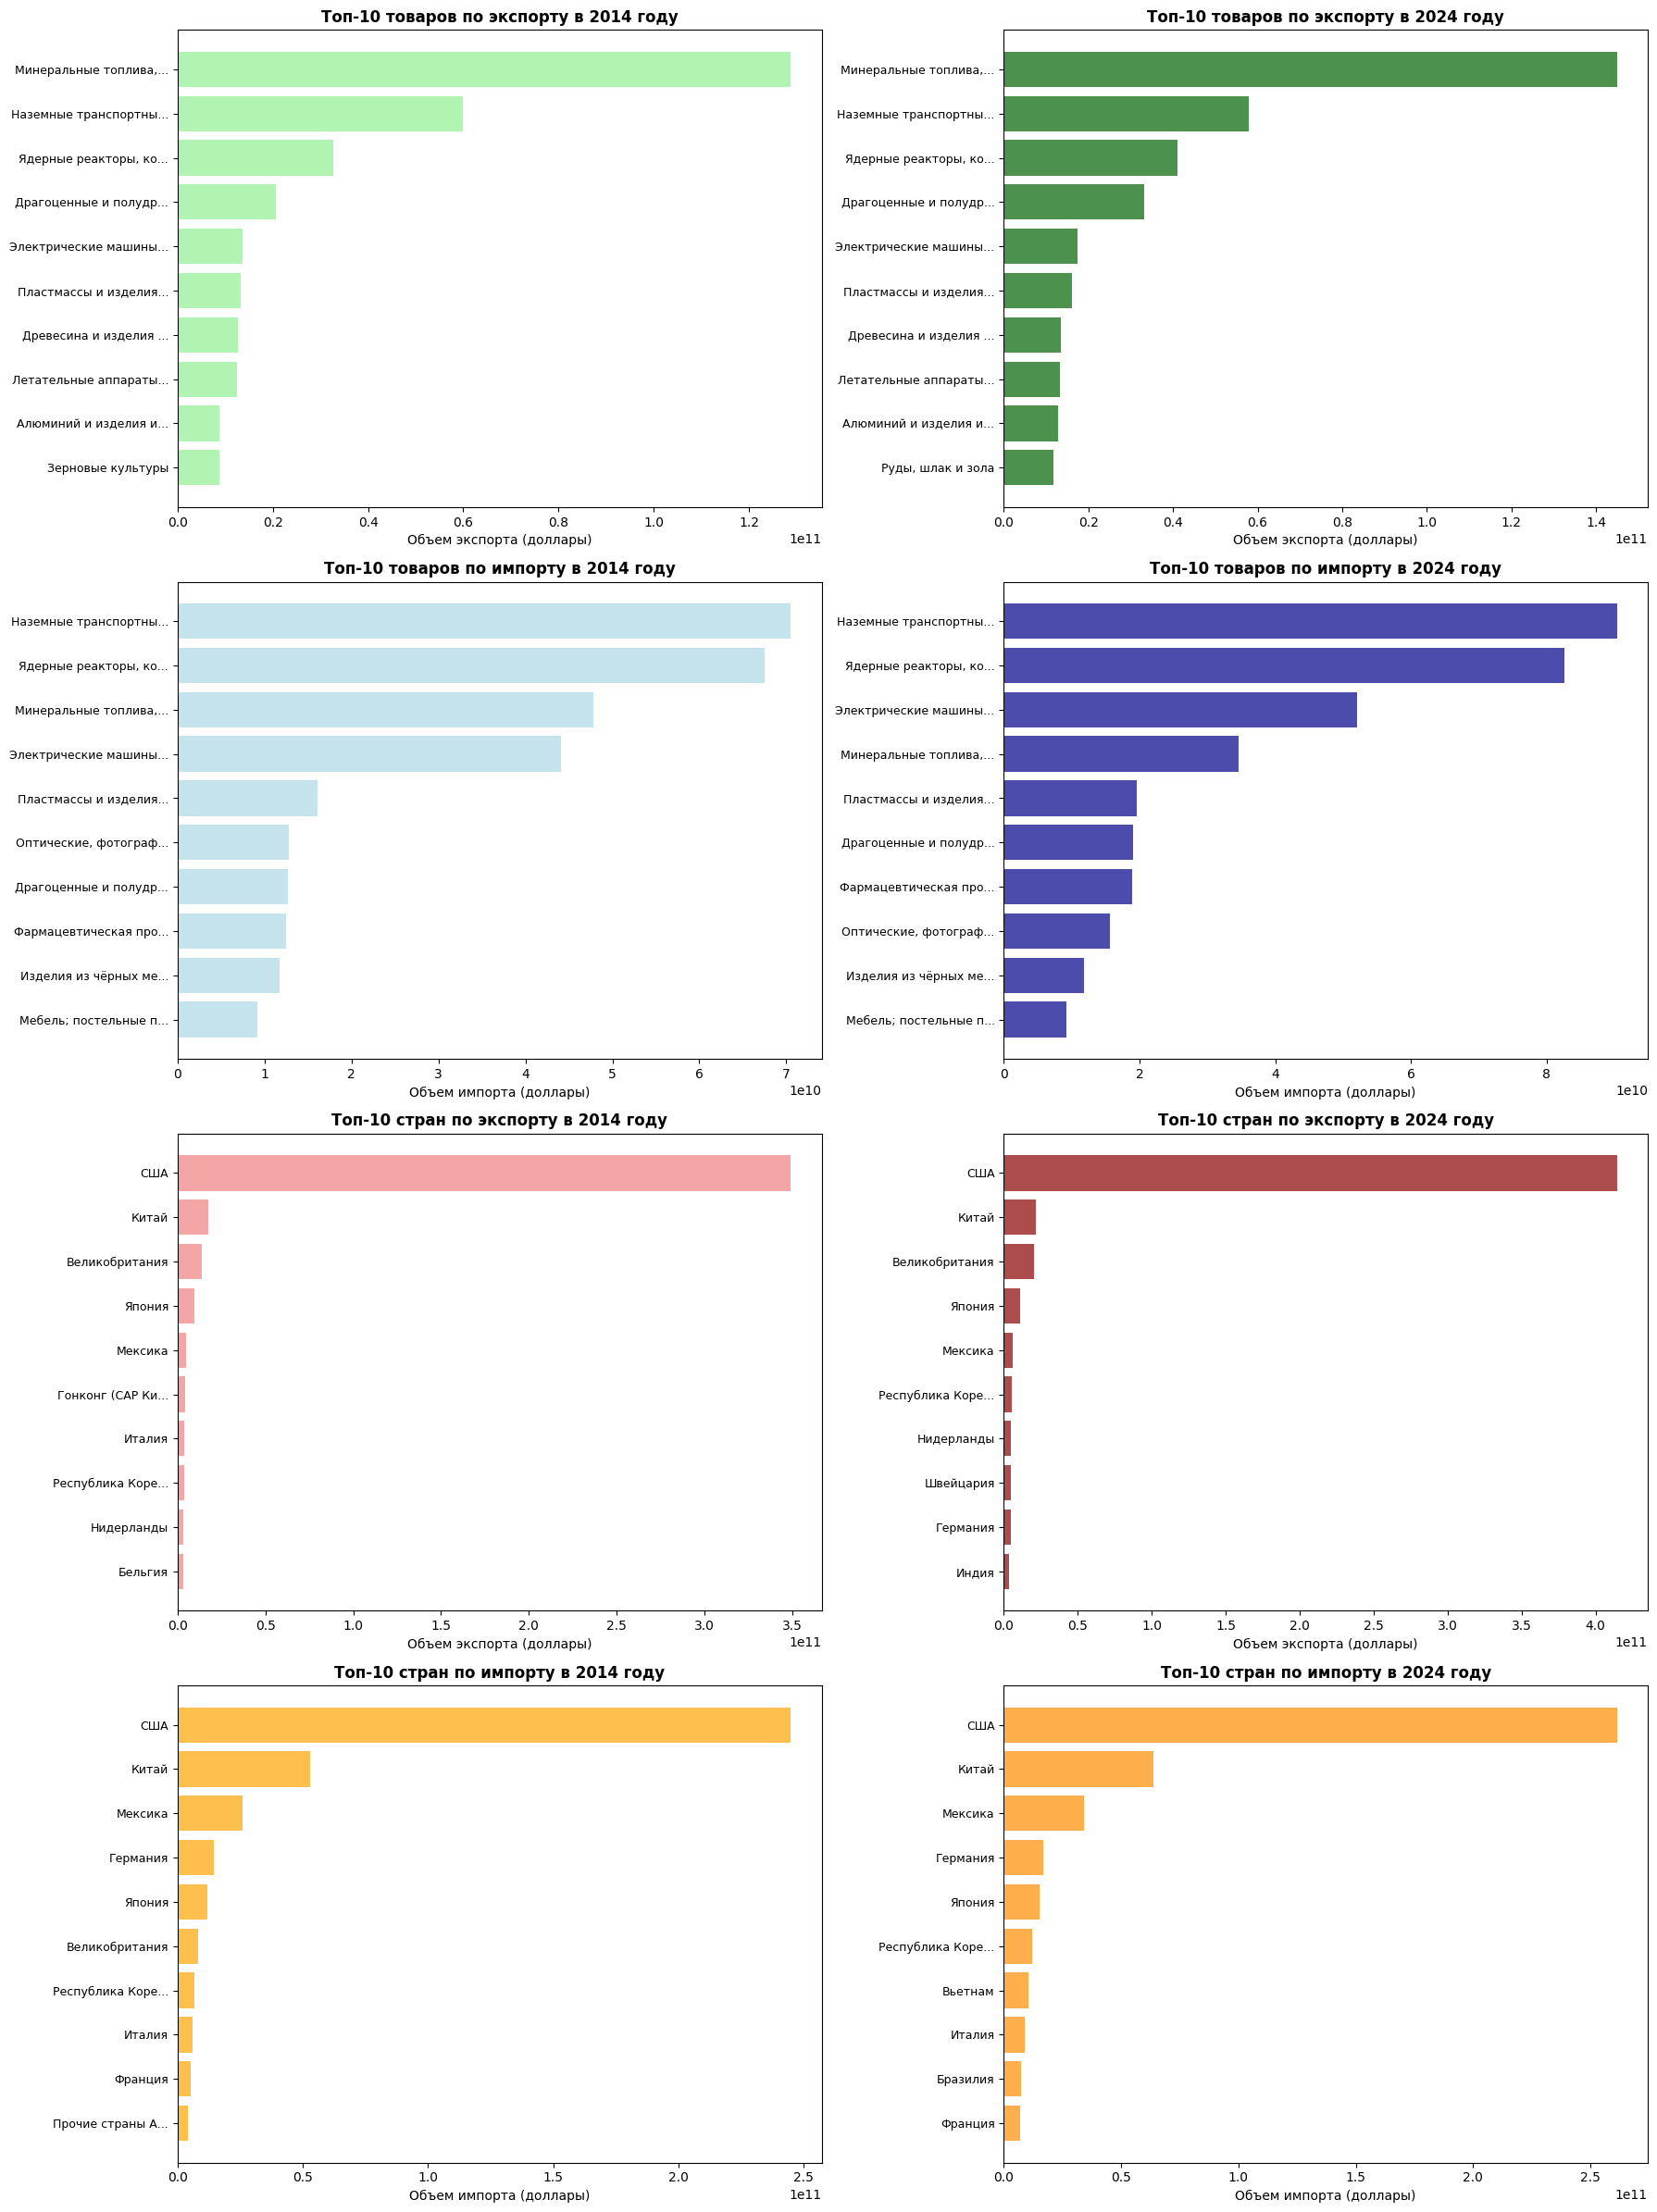


=== АНАЛИЗ ИЗМЕНЕНИЙ В СТРУКТУРЕ ТОРГОВЛИ ===

Изменения в топ-10 экспортных товаров:
Новые товары в топ-10: ['Руды, шлак и зола']
Выбыли из топ-10: ['Зерновые культуры']

Изменения в топ-10 импортных товаров:
Новые товары в топ-10: Нет
Выбыли из топ-10: Нет

Изменения в топ-10 стран по экспорту:
Новые страны в топ-10: ['Германия', 'Индия', 'Швейцария']
Выбыли из топ-10: ['Бельгия', 'Гонконг (САР Китая)', 'Италия']

Изменения в топ-10 стран по импорту:
Новые страны в топ-10: ['Вьетнам', 'Бразилия']
Выбыли из топ-10: ['Великобритания', 'Прочие страны Азии']

=== ОБЩИЕ ИЗМЕНЕНИЯ ===
Общий экспорт:
  2014: 458,183,072,111 долларов
  2024: 546,797,286,380 долларов
  Изменение: +19.3%

Общий импорт:
  2014: 454,400,079,563 долларов
  2024: 539,031,109,486 долларов
  Изменение: +18.6%

Торговое сальдо:
  2014: 3,782,992,548 долларов
  2024: 7,766,176,895 долларов
  Изменение: +3,983,184,347 долларов


In [50]:
# 8. Как изменилась структура торговли за последние 10 лет?

print("=== ИЗМЕНЕНИЕ СТРУКТУРЫ ТОРГОВЛИ ЗА ПОСЛЕДНИЕ 10 ЛЕТ ===")

# Определяем годы для сравнения
max_year = full_trade_data['period'].max()
min_year = max_year - 10

print(f"Сравниваем {min_year} год и {max_year} год")

# Фильтруем данные за эти два года
data_min_year = full_trade_data[full_trade_data['period'] == min_year]
data_max_year = full_trade_data[full_trade_data['period'] == max_year]

print(f"Записей за {min_year} год: {len(data_min_year)}")
print(f"Записей за {max_year} год: {len(data_max_year)}")

# a) АНАЛИЗ ТОВАРОВ

# Топ-10 товаров по экспорту в начальном году
export_min_year = (data_min_year[data_min_year['flowCode'] == 'X']
                   .groupby('commodity_name')['primaryValue']
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))

# Топ-10 товаров по экспорту в последнем году
export_max_year = (data_max_year[data_max_year['flowCode'] == 'X']
                   .groupby('commodity_name')['primaryValue']
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))

# Топ-10 товаров по импорту в начальном году
import_min_year = (data_min_year[data_min_year['flowCode'] == 'M']
                   .groupby('commodity_name')['primaryValue']
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))

# Топ-10 товаров по импорту в последнем году
import_max_year = (data_max_year[data_max_year['flowCode'] == 'M']
                   .groupby('commodity_name')['primaryValue']
                   .sum()
                   .sort_values(ascending=False)
                   .head(10))

print(f"\nТоп-10 товаров по экспорту в {min_year} году:")
display(export_min_year.reset_index())
print(f"\nТоп-10 товаров по экспорту в {max_year} году:")
display(export_max_year.reset_index())

print(f"\nТоп-10 товаров по импорту в {min_year} году:")
display(import_min_year.reset_index())
print(f"\nТоп-10 товаров по импорту в {max_year} году:")
display(import_max_year.reset_index())

# b) АНАЛИЗ СТРАН-ПАРТНЕРОВ

# Топ-10 стран по экспорту в начальном году
countries_export_min = (data_min_year[data_min_year['flowCode'] == 'X']
                        .groupby('partner_name')['primaryValue']
                        .sum()
                        .sort_values(ascending=False)
                        .head(10))

# Топ-10 стран по экспорту в последнем году
countries_export_max = (data_max_year[data_max_year['flowCode'] == 'X']
                        .groupby('partner_name')['primaryValue']
                        .sum()
                        .sort_values(ascending=False)
                        .head(10))

# Топ-10 стран по импорту в начальном году
countries_import_min = (data_min_year[data_min_year['flowCode'] == 'M']
                        .groupby('partner_name')['primaryValue']
                        .sum()
                        .sort_values(ascending=False)
                        .head(10))

# Топ-10 стран по импорту в последнем году
countries_import_max = (data_max_year[data_max_year['flowCode'] == 'M']
                        .groupby('partner_name')['primaryValue']
                        .sum()
                        .sort_values(ascending=False)
                        .head(10))

print(f"\nТоп-10 стран по экспорту в {min_year} году:")
display(countries_export_min.reset_index())
print(f"\nТоп-10 стран по экспорту в {max_year} году:")
display(countries_export_max.reset_index())

print(f"\nТоп-10 стран по импорту в {min_year} году:")
display(countries_import_min.reset_index())
print(f"\nТоп-10 стран по импорту в {max_year} году:")
display(countries_import_max.reset_index())

# ВИЗУАЛИЗАЦИИ
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
plt.style.use('default')
sns.set_palette("husl")

# Создаем фигуру с подграфиками (4 строки, 2 столбца)
fig, axes = plt.subplots(4, 2, figsize=(18, 24))

# График 1: Сравнение топ-10 товаров по экспорту
axes[0, 0].barh(range(len(export_min_year)), export_min_year.values,
                color='lightgreen', alpha=0.7, label=f'{min_year} год')
axes[0, 0].set_yticks(range(len(export_min_year)))
axes[0, 0].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                           for name in export_min_year.index], fontsize=9)
axes[0, 0].set_title(f'Топ-10 товаров по экспорту в {min_year} году', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Объем экспорта (доллары)')
axes[0, 0].invert_yaxis()

axes[0, 1].barh(range(len(export_max_year)), export_max_year.values,
                color='darkgreen', alpha=0.7, label=f'{max_year} год')
axes[0, 1].set_yticks(range(len(export_max_year)))
axes[0, 1].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                           for name in export_max_year.index], fontsize=9)
axes[0, 1].set_title(f'Топ-10 товаров по экспорту в {max_year} году', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Объем экспорта (доллары)')
axes[0, 1].invert_yaxis()

# График 2: Сравнение топ-10 товаров по импорту
axes[1, 0].barh(range(len(import_min_year)), import_min_year.values,
                color='lightblue', alpha=0.7, label=f'{min_year} год')
axes[1, 0].set_yticks(range(len(import_min_year)))
axes[1, 0].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                           for name in import_min_year.index], fontsize=9)
axes[1, 0].set_title(f'Топ-10 товаров по импорту в {min_year} году', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Объем импорта (доллары)')
axes[1, 0].invert_yaxis()

axes[1, 1].barh(range(len(import_max_year)), import_max_year.values,
                color='darkblue', alpha=0.7, label=f'{max_year} год')
axes[1, 1].set_yticks(range(len(import_max_year)))
axes[1, 1].set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                           for name in import_max_year.index], fontsize=9)
axes[1, 1].set_title(f'Топ-10 товаров по импорту в {max_year} году', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Объем импорта (доллары)')
axes[1, 1].invert_yaxis()

# График 3: Сравнение топ-10 стран по экспорту
axes[2, 0].barh(range(len(countries_export_min)), countries_export_min.values,
                color='lightcoral', alpha=0.7, label=f'{min_year} год')
axes[2, 0].set_yticks(range(len(countries_export_min)))
axes[2, 0].set_yticklabels([name[:15] + '...' if len(name) > 15 else name
                           for name in countries_export_min.index], fontsize=9)
axes[2, 0].set_title(f'Топ-10 стран по экспорту в {min_year} году', fontsize=12, fontweight='bold')
axes[2, 0].set_xlabel('Объем экспорта (доллары)')
axes[2, 0].invert_yaxis()

axes[2, 1].barh(range(len(countries_export_max)), countries_export_max.values,
                color='darkred', alpha=0.7, label=f'{max_year} год')
axes[2, 1].set_yticks(range(len(countries_export_max)))
axes[2, 1].set_yticklabels([name[:15] + '...' if len(name) > 15 else name
                           for name in countries_export_max.index], fontsize=9)
axes[2, 1].set_title(f'Топ-10 стран по экспорту в {max_year} году', fontsize=12, fontweight='bold')
axes[2, 1].set_xlabel('Объем экспорта (доллары)')
axes[2, 1].invert_yaxis()

# График 4: Сравнение топ-10 стран по импорту
axes[3, 0].barh(range(len(countries_import_min)), countries_import_min.values,
                color='orange', alpha=0.7, label=f'{min_year} год')
axes[3, 0].set_yticks(range(len(countries_import_min)))
axes[3, 0].set_yticklabels([name[:15] + '...' if len(name) > 15 else name
                           for name in countries_import_min.index], fontsize=9)
axes[3, 0].set_title(f'Топ-10 стран по импорту в {min_year} году', fontsize=12, fontweight='bold')
axes[3, 0].set_xlabel('Объем импорта (доллары)')
axes[3, 0].invert_yaxis()

axes[3, 1].barh(range(len(countries_import_max)), countries_import_max.values,
                color='darkorange', alpha=0.7, label=f'{max_year} год')
axes[3, 1].set_yticks(range(len(countries_import_max)))
axes[3, 1].set_yticklabels([name[:15] + '...' if len(name) > 15 else name
                           for name in countries_import_max.index], fontsize=9)
axes[3, 1].set_title(f'Топ-10 стран по импорту в {max_year} году', fontsize=12, fontweight='bold')
axes[3, 1].set_xlabel('Объем импорта (доллары)')
axes[3, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# АНАЛИЗ ИЗМЕНЕНИЙ
print(f"\n=== АНАЛИЗ ИЗМЕНЕНИЙ В СТРУКТУРЕ ТОРГОВЛИ ===")

# Новые товары в топ-10 экспорта
new_export_goods = set(export_max_year.index) - set(export_min_year.index)
lost_export_goods = set(export_min_year.index) - set(export_max_year.index)

print(f"\nИзменения в топ-10 экспортных товаров:")
print(f"Новые товары в топ-10: {list(new_export_goods) if new_export_goods else 'Нет'}")
print(f"Выбыли из топ-10: {list(lost_export_goods) if lost_export_goods else 'Нет'}")

# Новые товары в топ-10 импорта
new_import_goods = set(import_max_year.index) - set(import_min_year.index)
lost_import_goods = set(import_min_year.index) - set(import_max_year.index)

print(f"\nИзменения в топ-10 импортных товаров:")
print(f"Новые товары в топ-10: {list(new_import_goods) if new_import_goods else 'Нет'}")
print(f"Выбыли из топ-10: {list(lost_import_goods) if lost_import_goods else 'Нет'}")

# Новые страны в топ-10 экспорта
new_export_countries = set(countries_export_max.index) - set(countries_export_min.index)
lost_export_countries = set(countries_export_min.index) - set(countries_export_max.index)

print(f"\nИзменения в топ-10 стран по экспорту:")
print(f"Новые страны в топ-10: {list(new_export_countries) if new_export_countries else 'Нет'}")
print(f"Выбыли из топ-10: {list(lost_export_countries) if lost_export_countries else 'Нет'}")

# Новые страны в топ-10 импорта
new_import_countries = set(countries_import_max.index) - set(countries_import_min.index)
lost_import_countries = set(countries_import_min.index) - set(countries_import_max.index)

print(f"\nИзменения в топ-10 стран по импорту:")
print(f"Новые страны в топ-10: {list(new_import_countries) if new_import_countries else 'Нет'}")
print(f"Выбыли из топ-10: {list(lost_import_countries) if lost_import_countries else 'Нет'}")

# Общие статистики
total_export_min = data_min_year[data_min_year['flowCode'] == 'X']['primaryValue'].sum()
total_export_max = data_max_year[data_max_year['flowCode'] == 'X']['primaryValue'].sum()
total_import_min = data_min_year[data_min_year['flowCode'] == 'M']['primaryValue'].sum()
total_import_max = data_max_year[data_max_year['flowCode'] == 'M']['primaryValue'].sum()

print(f"\n=== ОБЩИЕ ИЗМЕНЕНИЯ ===")
print(f"Общий экспорт:")
print(f"  {min_year}: {total_export_min:,.0f} долларов")
print(f"  {max_year}: {total_export_max:,.0f} долларов")
print(f"  Изменение: {((total_export_max - total_export_min) / total_export_min * 100):+.1f}%")

print(f"\nОбщий импорт:")
print(f"  {min_year}: {total_import_min:,.0f} долларов")
print(f"  {max_year}: {total_import_max:,.0f} долларов")
print(f"  Изменение: {((total_import_max - total_import_min) / total_import_min * 100):+.1f}%")

print(f"\nТорговое сальдо:")
balance_min = total_export_min - total_import_min
balance_max = total_export_max - total_import_max
print(f"  {min_year}: {balance_min:,.0f} долларов")
print(f"  {max_year}: {balance_max:,.0f} долларов")
print(f"  Изменение: {balance_max - balance_min:+,.0f} долларов")
